In [1]:
import world
import agents
from ff import Solved
import ff
import pddl_functions
from teacher import TeacherAgent
import os
import numpy as np
from scipy.stats import norm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pandas as pd
import gc
import pickle
from evaluation import plot_cumsum, test_colour_model, ResultsFile, get_agent
import configparser
import logging
from collections import defaultdict
import prob_model
import sqlalchemy

In [2]:
def get_kde_config(config_name):
    model_config = configparser.ConfigParser()
    model_config.read('config/kde.ini')
    model_config = model_config[config_name]
    config_dict = {}
    config_dict['use_3d'] = model_config.getboolean('use_3d')
    config_dict['fix_bw'] = model_config.getboolean('fix_bw')
    config_dict['bw'] = model_config.getfloat('bw')
    config_dict['norm'] = model_config.getfloat('norm')
    return config_dict


In [3]:
problem_dir = 'onerule'
problems = list(os.listdir('tworules'))


In [4]:
w = world.PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problems[0]))
teacher = TeacherAgent()
agent = agents.CorrectingAgent(w, teacher=teacher, update_negative=False, 
                               colour_model_type='kde', model_config=get_kde_config('fixed_bw'))

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem1.pddl


Parsing domain blocks-domain.pddl
Parsing problem onerule/problem1.pddl
0 []


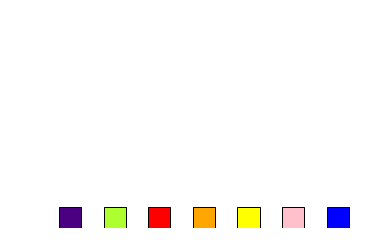

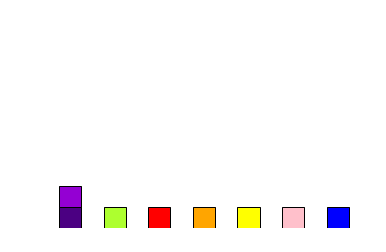

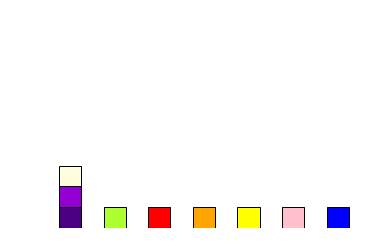

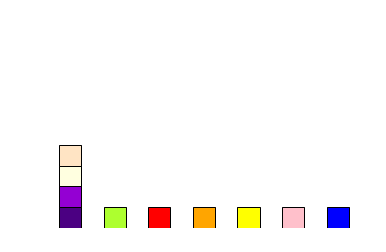

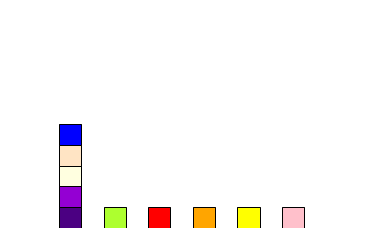

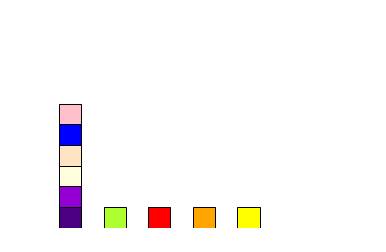

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


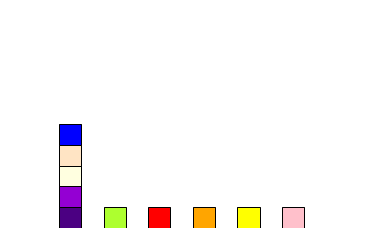

0.0268549583843182 [('b1', 'red'), ('b5', 'blue')]


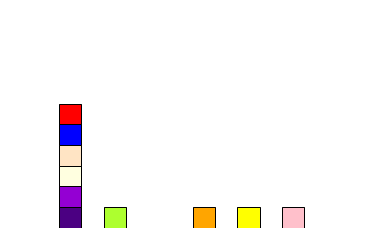

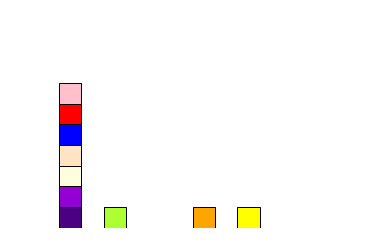

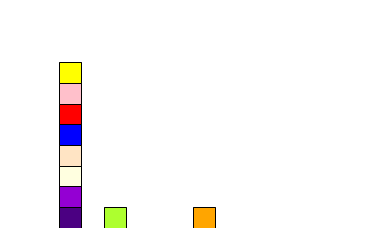

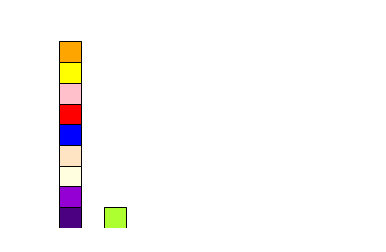

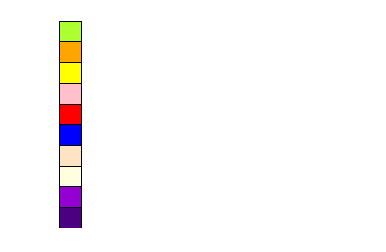

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem10.pddl
0.6869121024893099 [('b5', 'blue'), ('b6', 'red')]


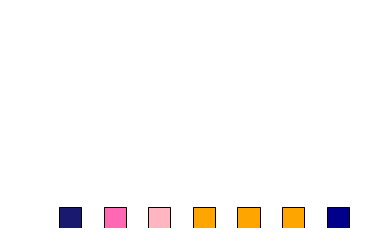

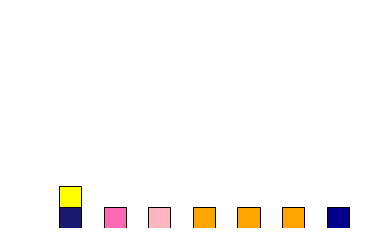

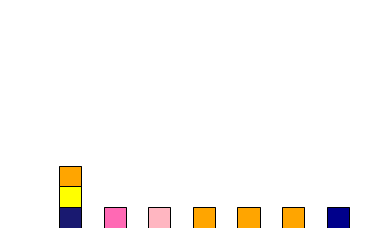

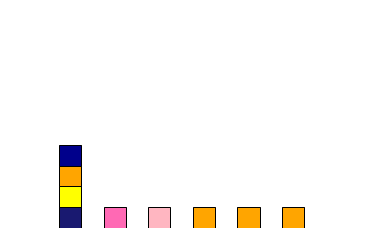

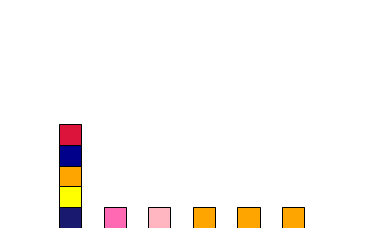

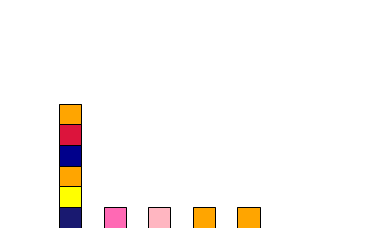

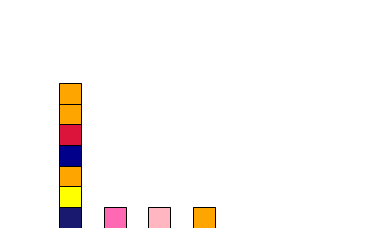

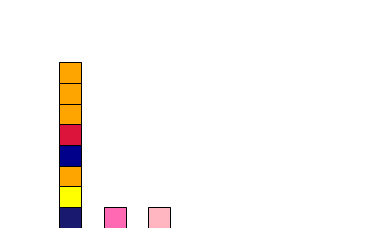

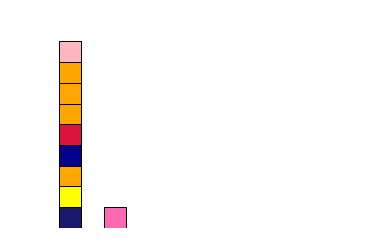

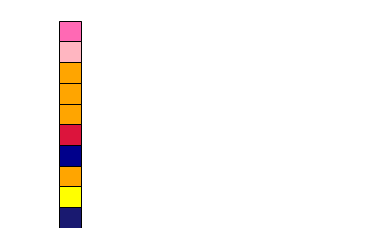

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem11.pddl
0.7372966691351893 [('b0', 'blue'), ('b5', 'blue'), ('b6', 'red'), ('b9', 'red')]


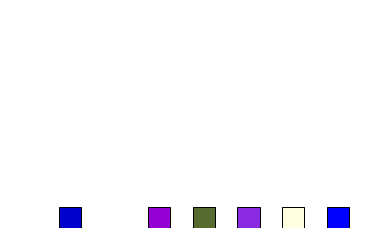

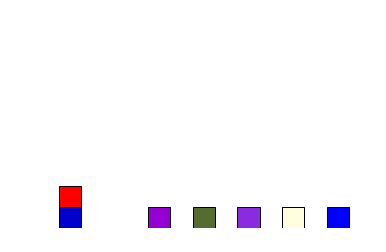

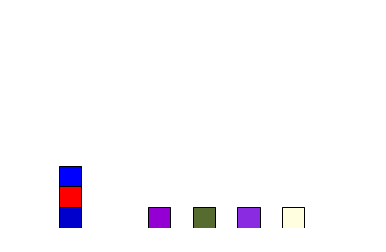

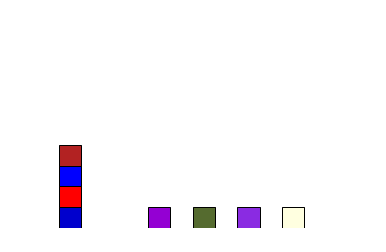

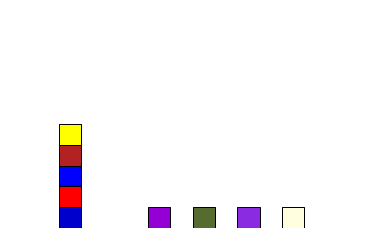

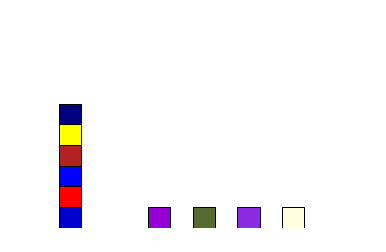

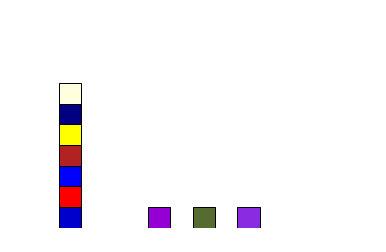

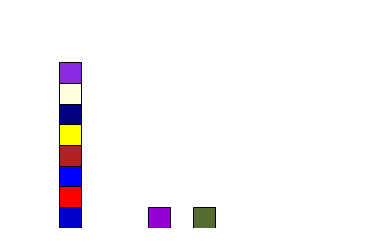

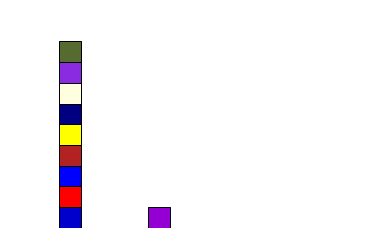

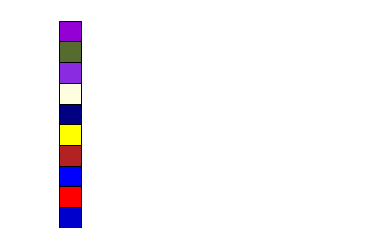

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem12.pddl
0.6571567474995069 [('b2', 'red')]
1.1624158107935858 [('b2', 'red'), ('b4', 'blue')]


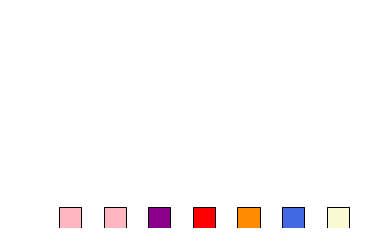

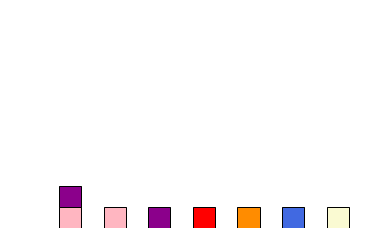

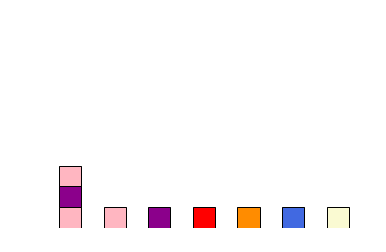

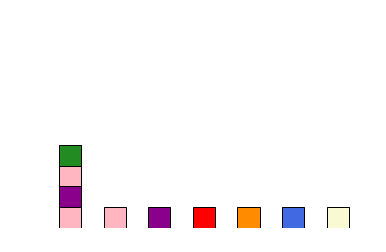

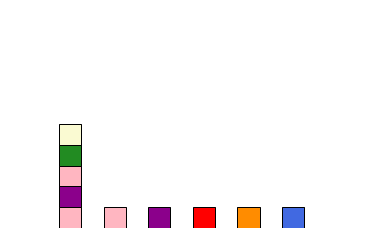

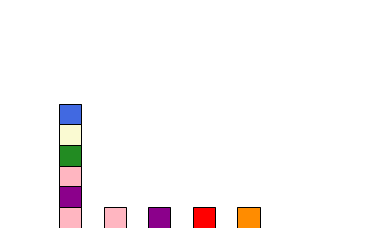

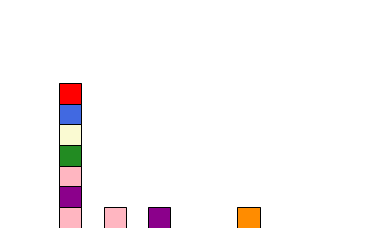

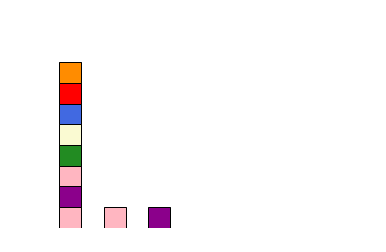

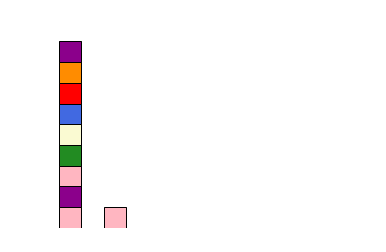

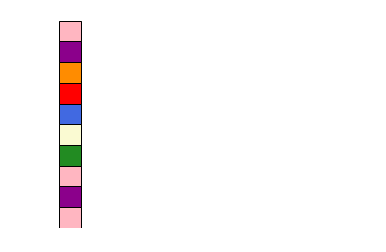

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem13.pddl
0.29841994298485136 [('b5', 'blue'), ('b6', 'red')]


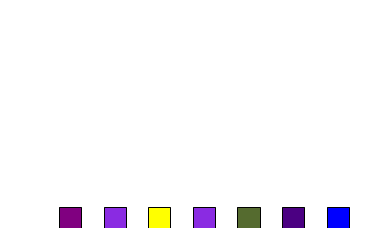

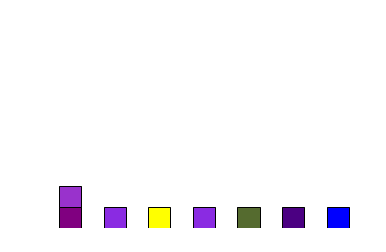

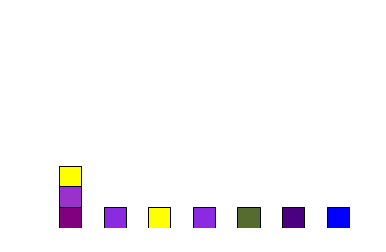

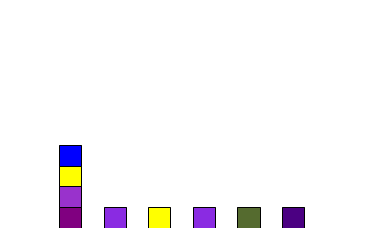

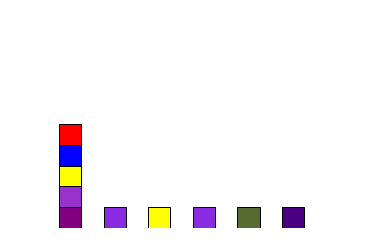

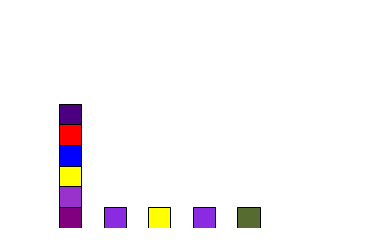

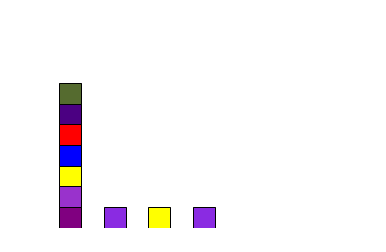

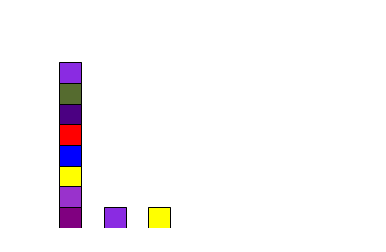

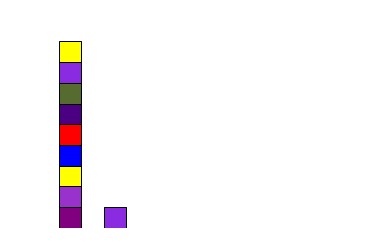

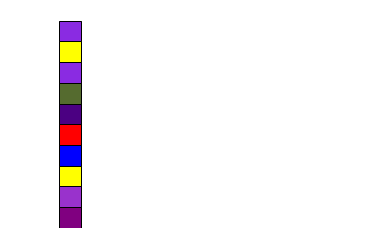

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem14.pddl
1.0438965011966728 [('b3', 'blue'), ('b8', 'blue'), ('b9', 'blue')]


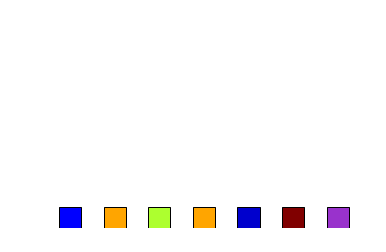

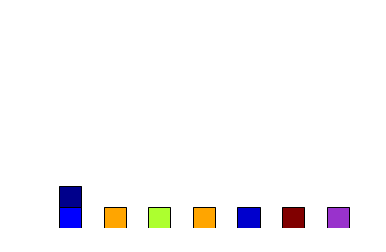

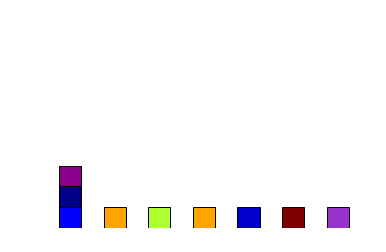

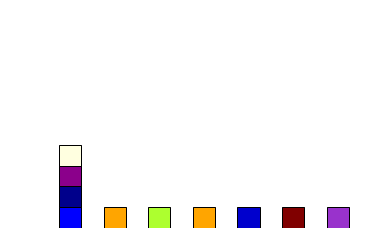

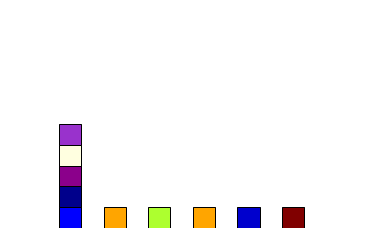

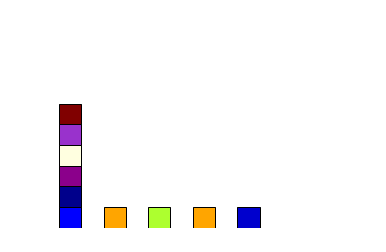

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


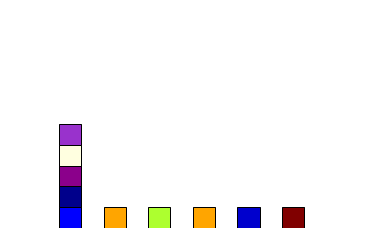

0.06422374874447795 [('b3', 'blue'), ('b4', 'red')]


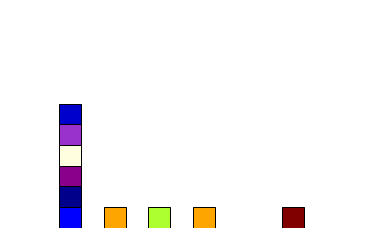

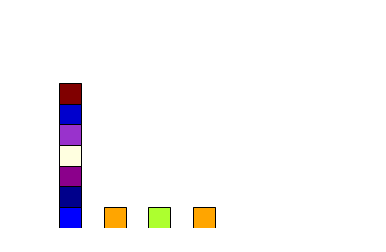

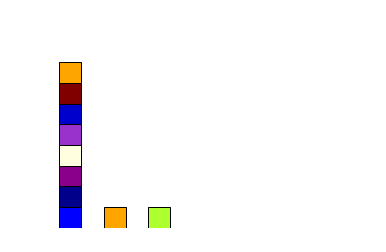

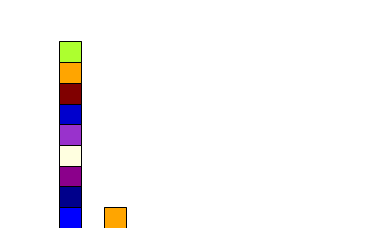

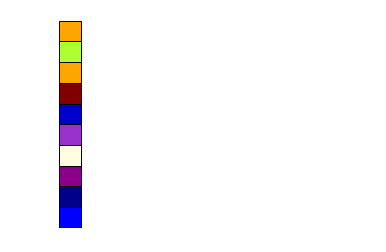

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem15.pddl
0.5128349911756864 [('b3', 'blue')]


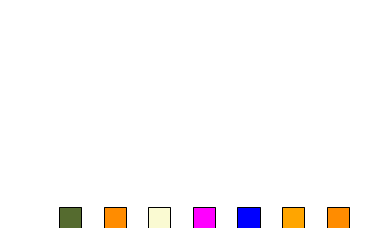

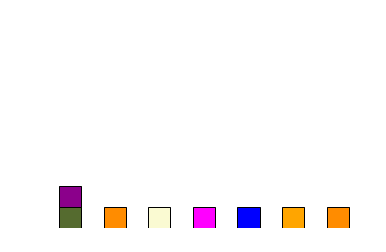

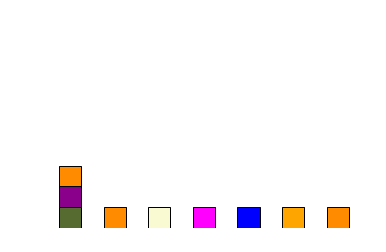

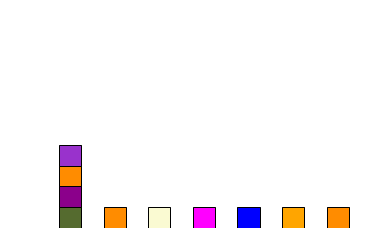

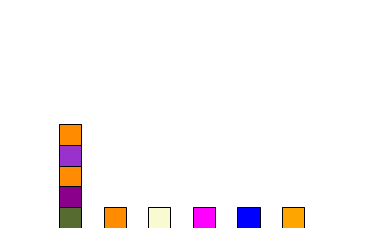

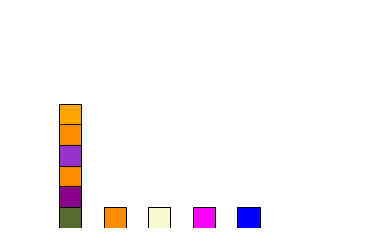

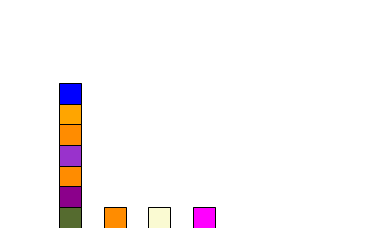

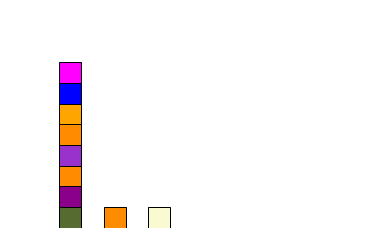

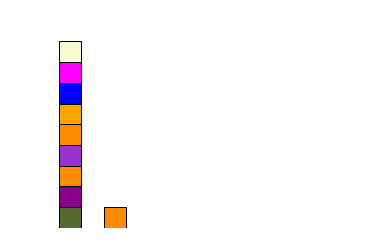

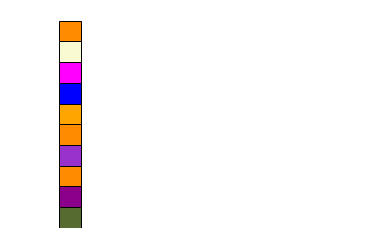

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem16.pddl
0.43541611271228914 [('b2', 'red'), ('b4', 'red')]
2.6833889482983815 [('b2', 'red'), ('b4', 'red'), ('b7', 'blue')]
4.042514216390655 [('b4', 'red')]
5.063090730885245 [('b2', 'red'), ('b4', 'red'), ('b7', 'blue'), ('b1', 'blue')]


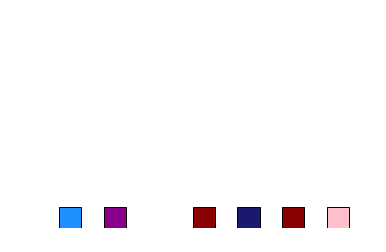

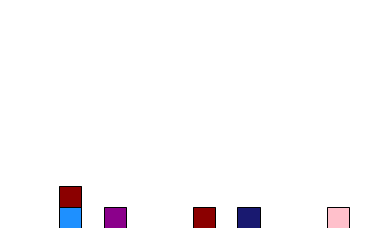

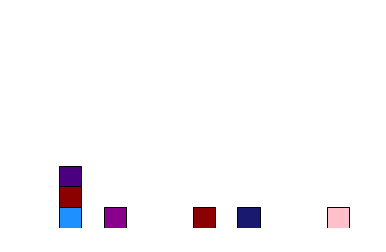

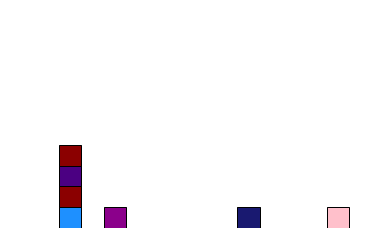

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


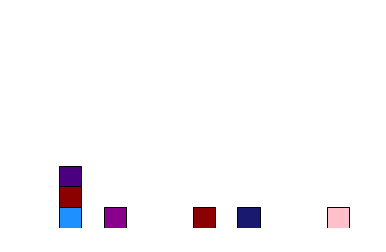

0.33347678439674844 [('b2', 'red')]
2.581141717819812 [('b2', 'red'), ('b7', 'blue')]
4.2386074578202795 []


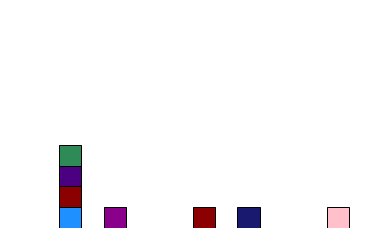

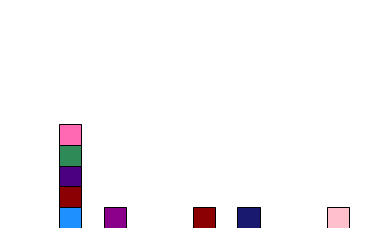

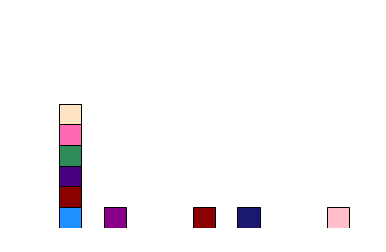

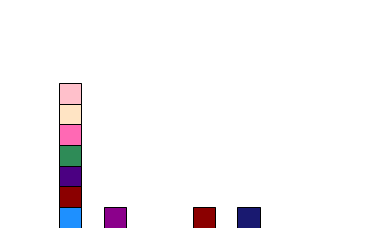

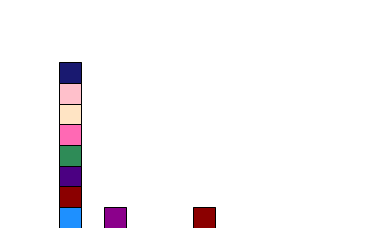

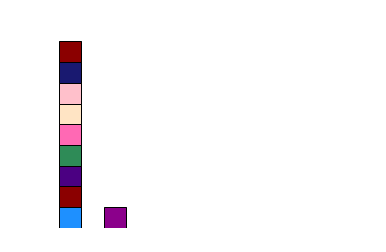

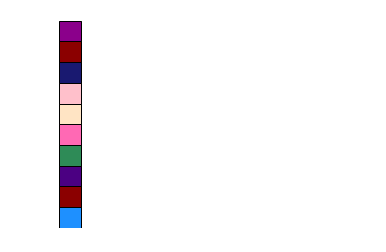

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem17.pddl
0.991580043556449 [('b7', 'red')]
1.4967576214554048 [('b7', 'red'), ('b1', 'blue')]


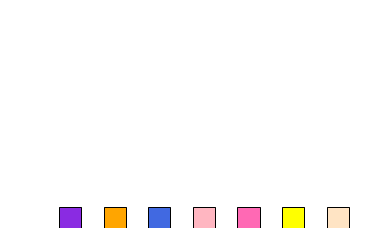

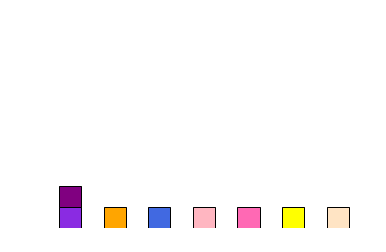

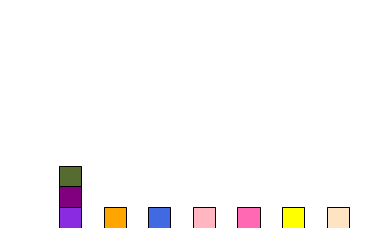

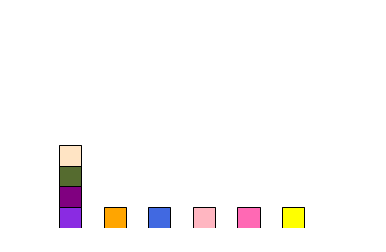

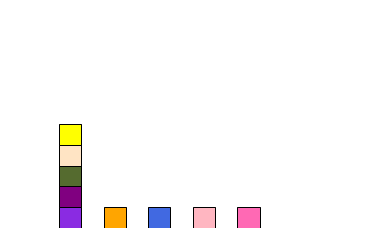

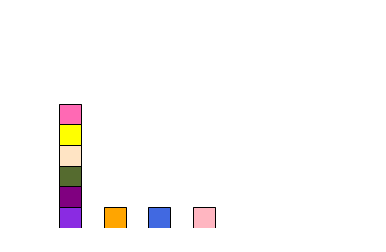

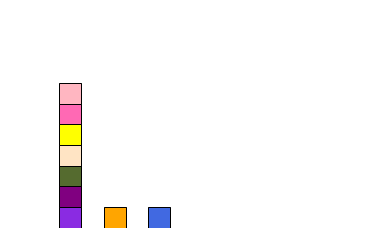

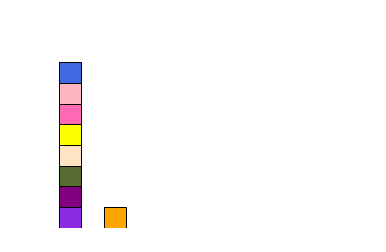

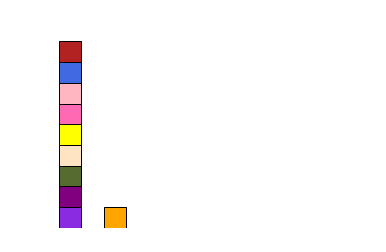

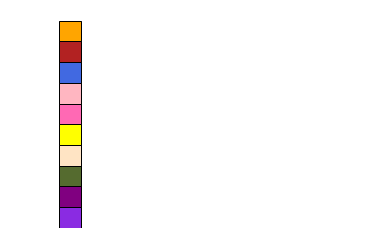

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem18.pddl
0.1413275939372123 [('b1', 'red'), ('b2', 'blue')]


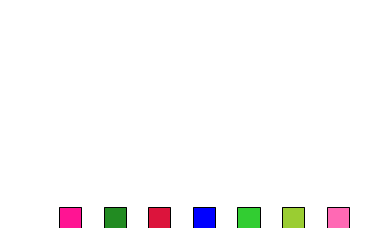

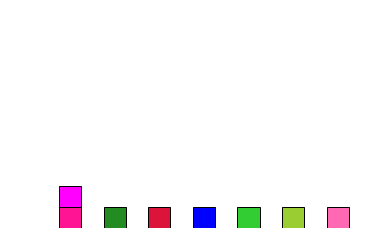

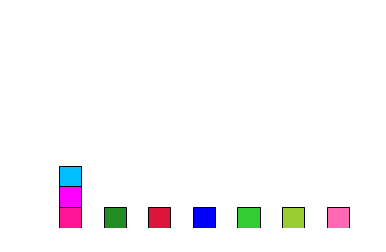

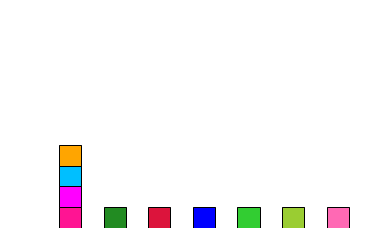

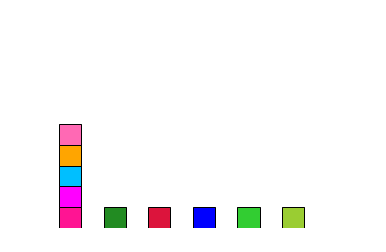

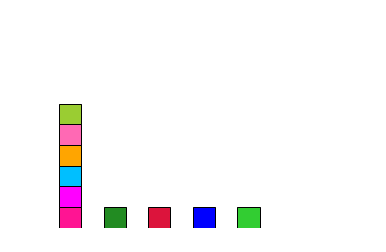

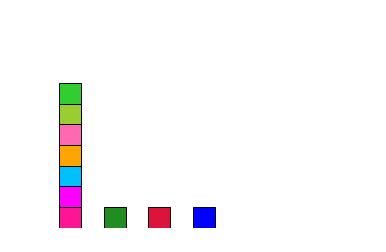

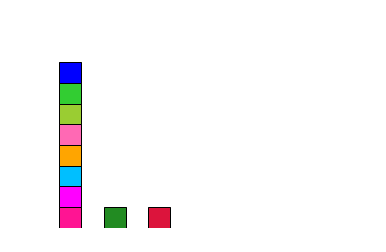

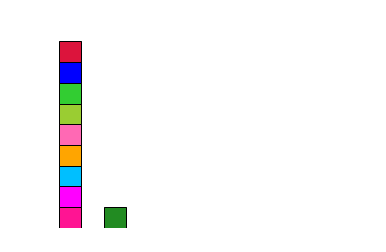

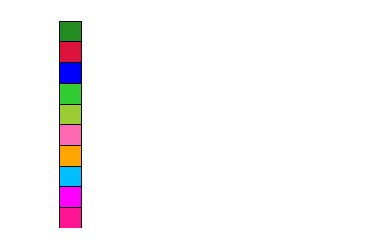

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem19.pddl
0.3748037904131687 [('b5', 'blue')]


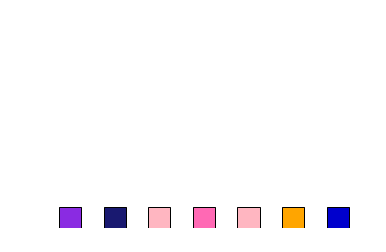

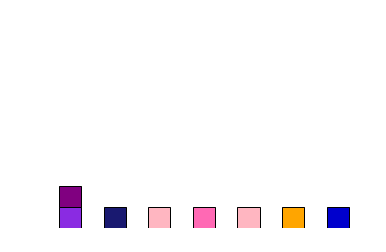

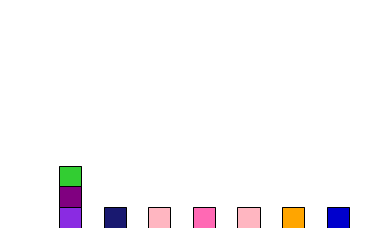

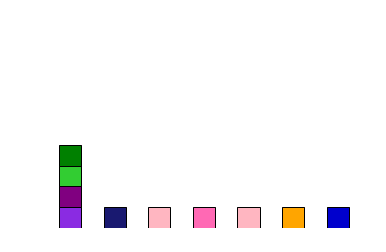

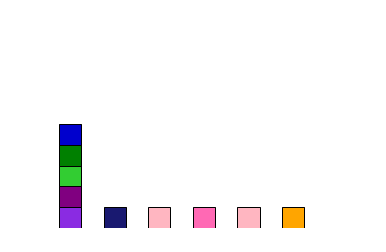

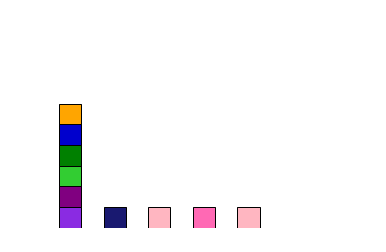

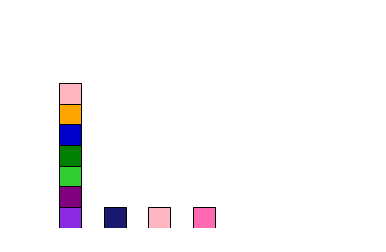

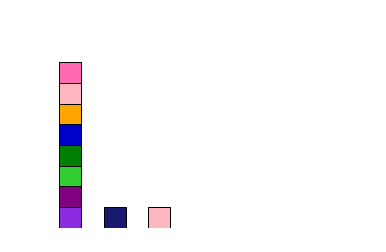

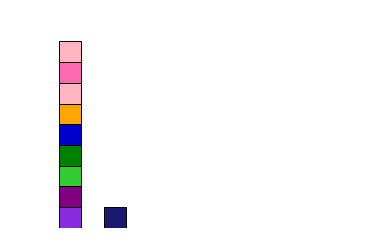

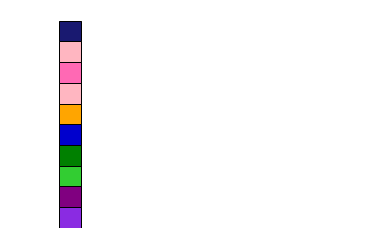

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem2.pddl
1.1226676633740966 [('b0', 'blue'), ('b5', 'blue'), ('b7', 'red')]


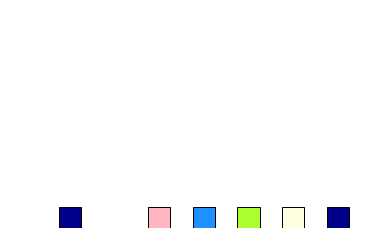

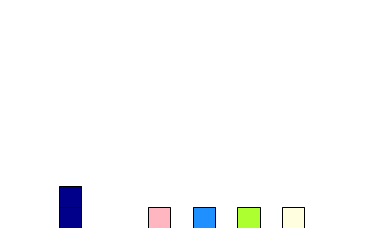

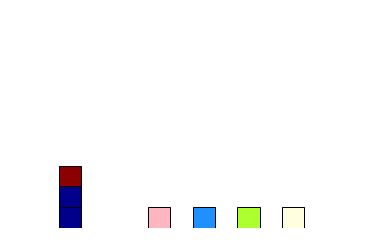

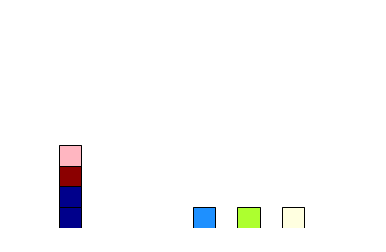

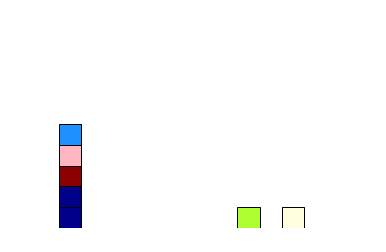

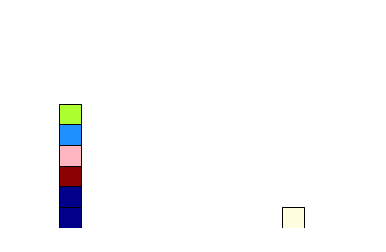

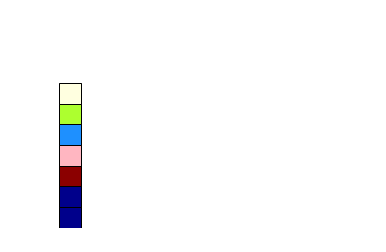

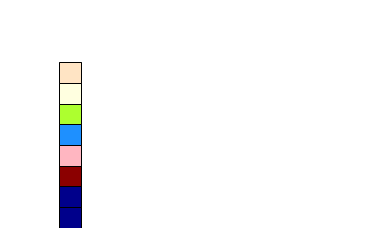

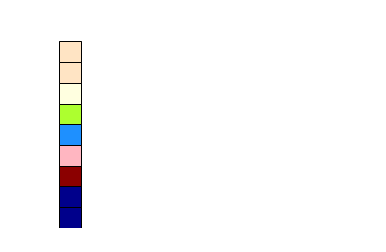

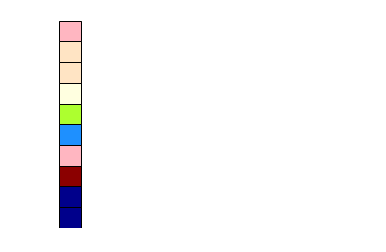

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem20.pddl
0.036878825542617844 []


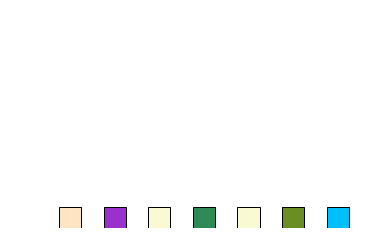

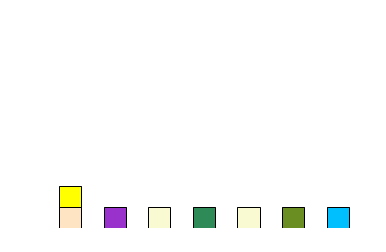

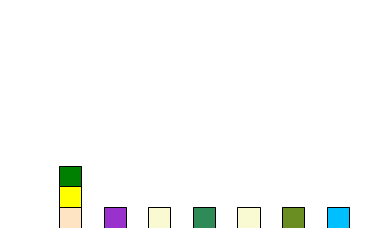

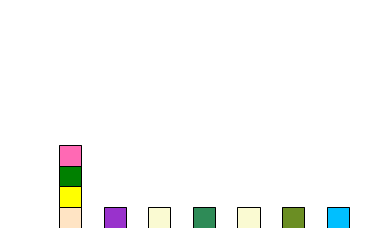

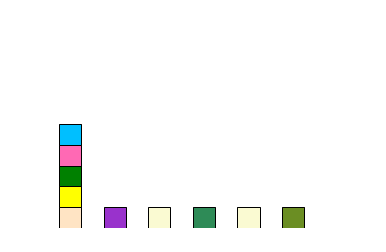

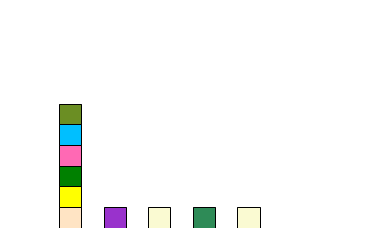

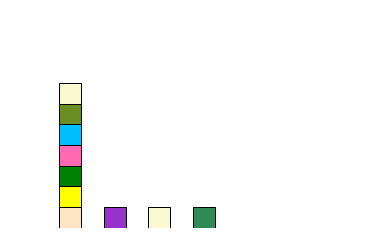

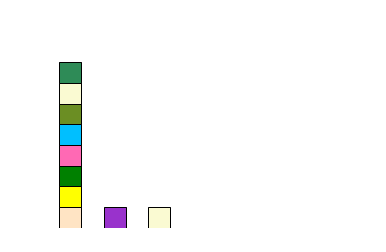

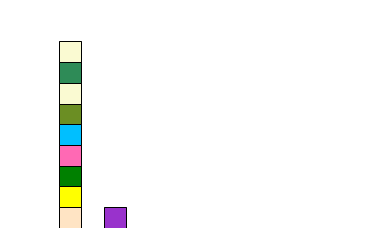

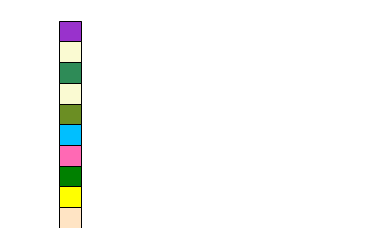

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem21.pddl
1.0361860543817896 [('b8', 'red'), ('b9', 'blue')]


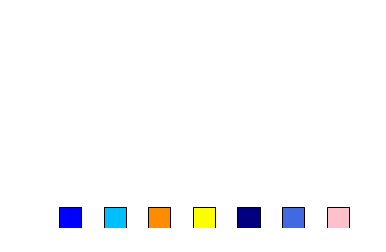

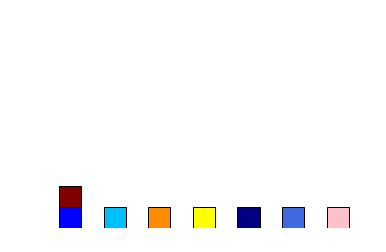

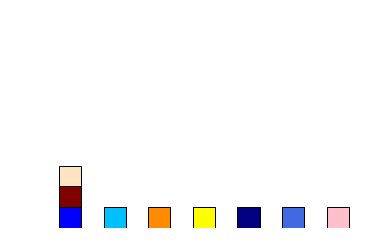

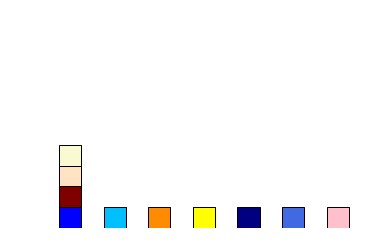

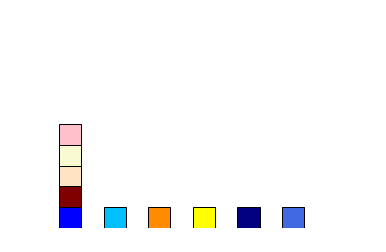

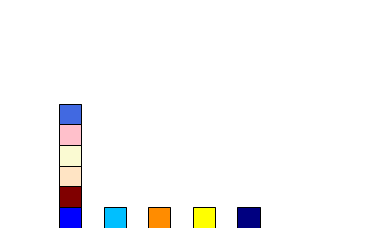

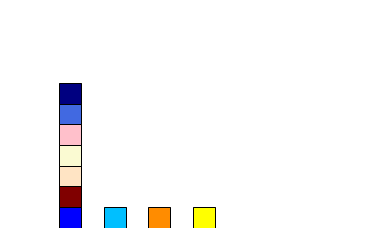

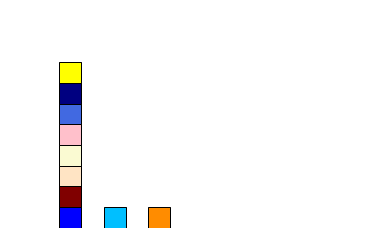

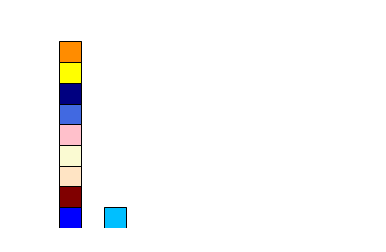

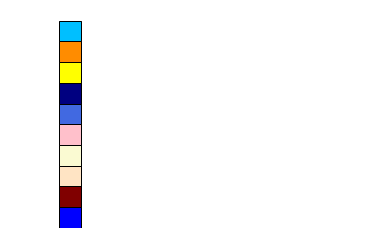

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem22.pddl
1.0509312536022872 [('b2', 'blue'), ('b4', 'blue')]


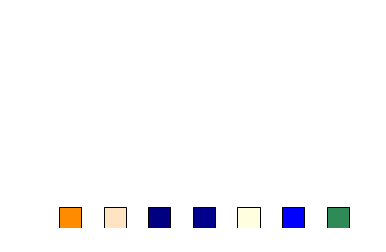

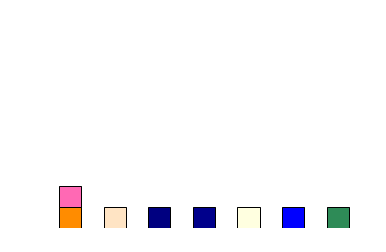

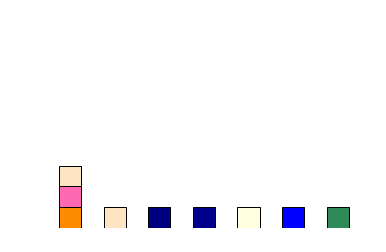

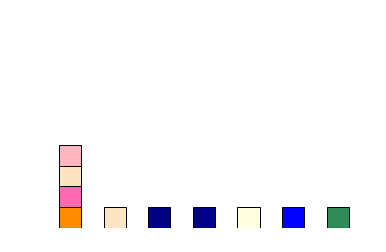

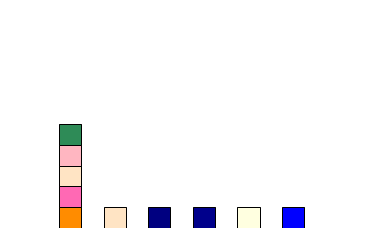

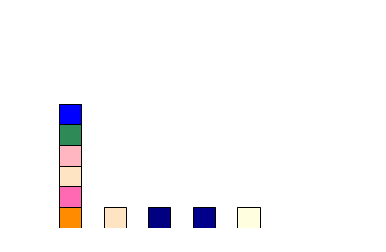

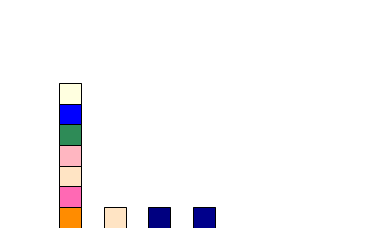

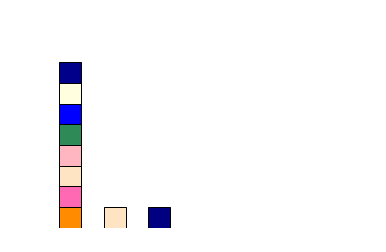

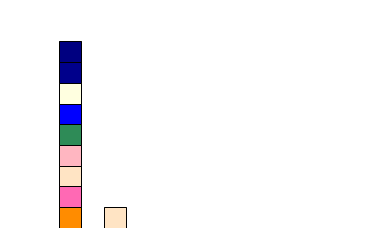

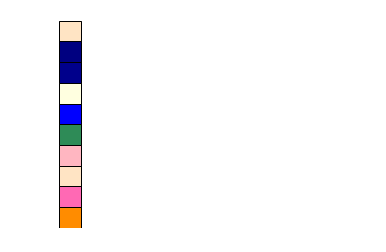

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem23.pddl
0.342486884709973 [('b4', 'red')]
2.588464196308118 []


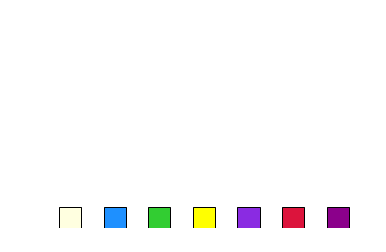

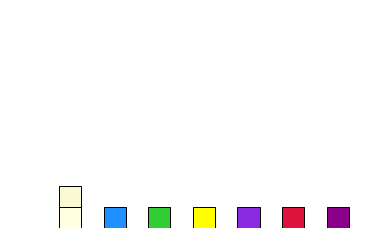

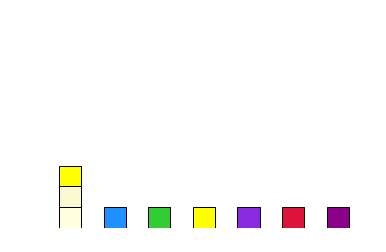

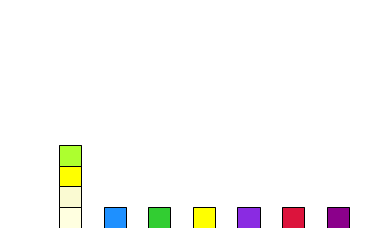

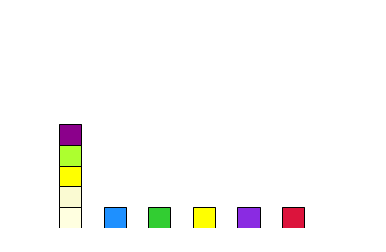

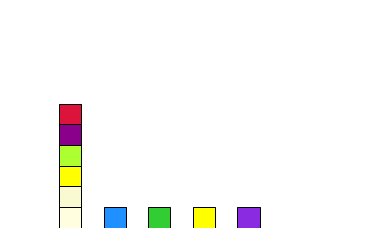

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


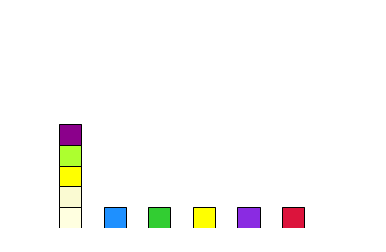

0.7135098564715926 [('b4', 'red')]
3.0932168588273763 [('b4', 'red'), ('b0', 'blue')]


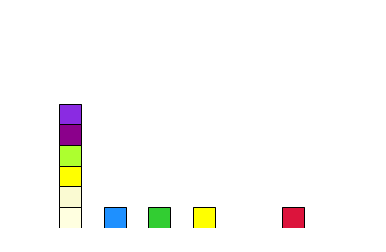

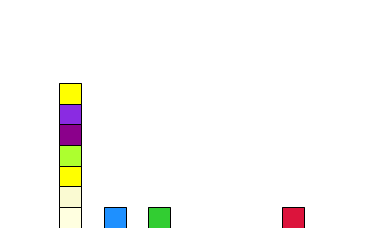

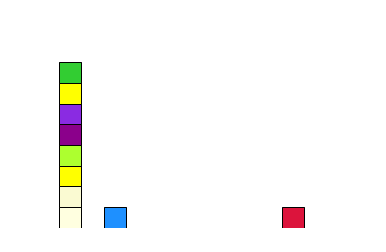

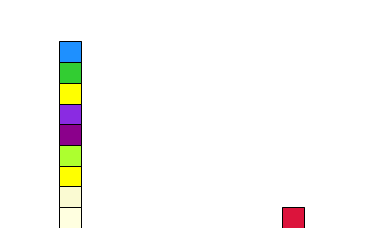

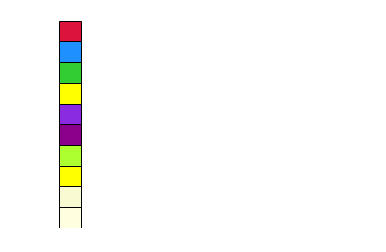

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem24.pddl
1.0849228116069973 [('b5', 'red')]
1.5824076470550628 [('b5', 'red'), ('b8', 'blue')]


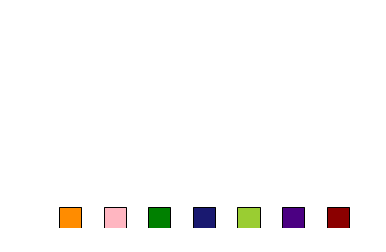

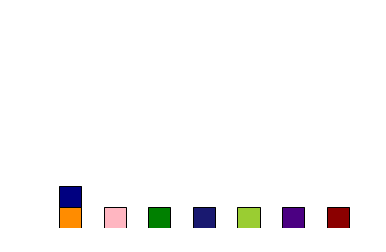

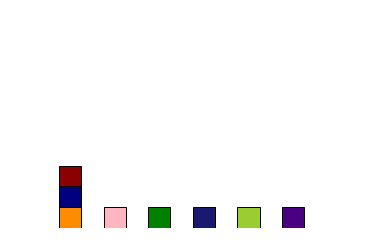

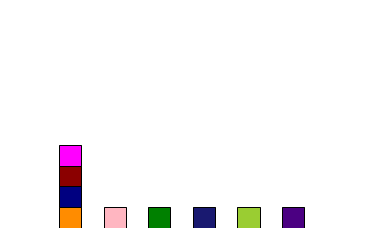

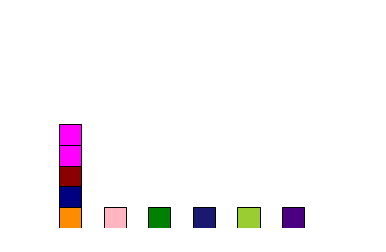

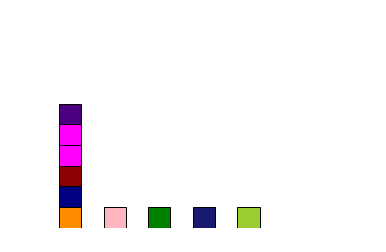

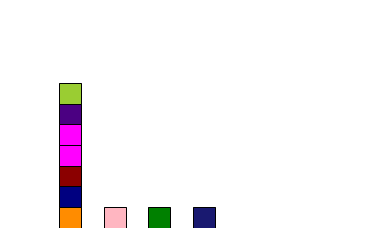

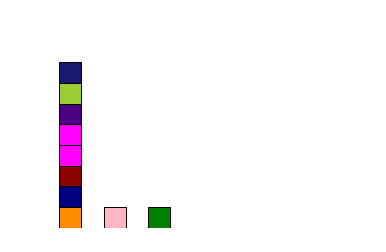

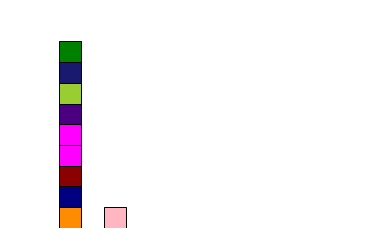

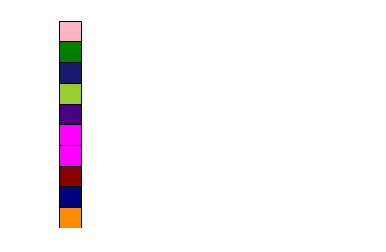

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem25.pddl
0.4540919841417113 []


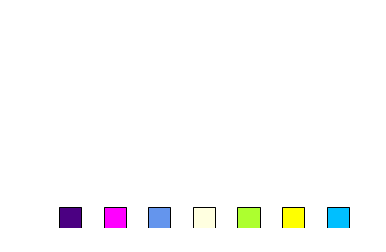

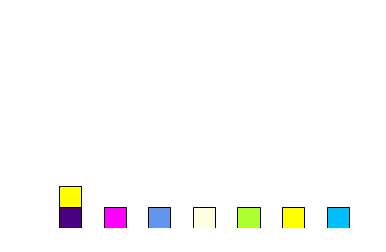

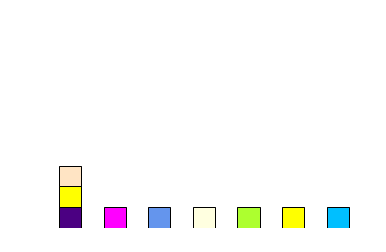

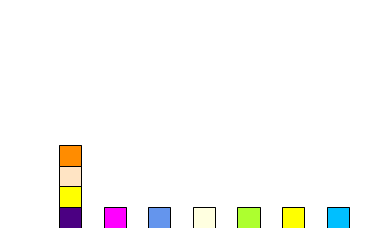

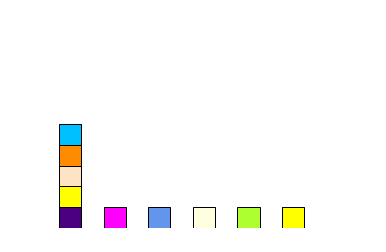

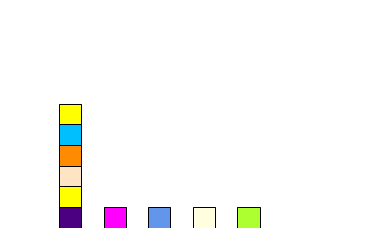

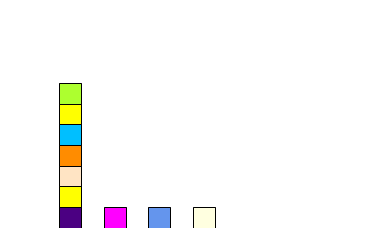

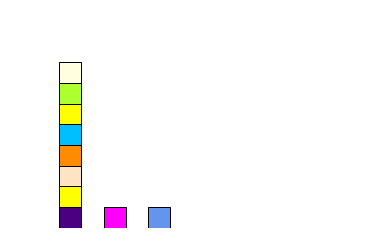

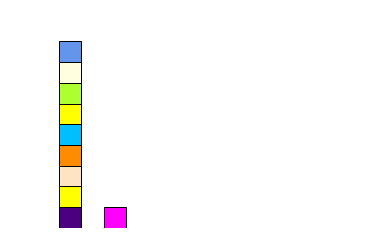

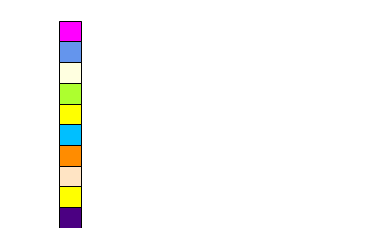

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem26.pddl
0.9776985085157872 [('b5', 'red')]
3.2253411478650946 [('b5', 'red'), ('b0', 'blue')]


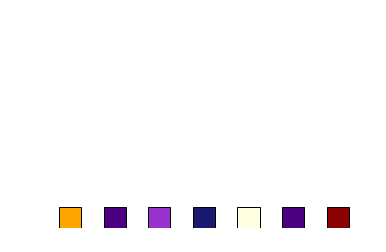

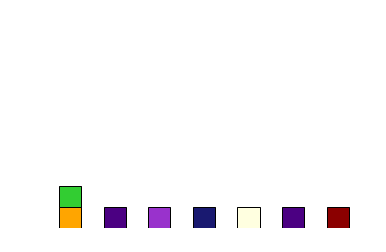

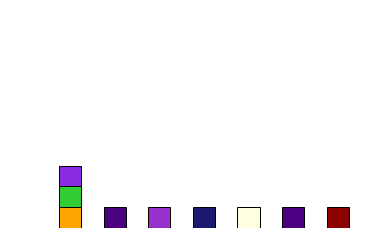

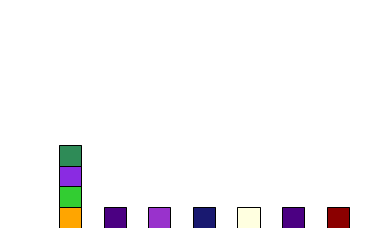

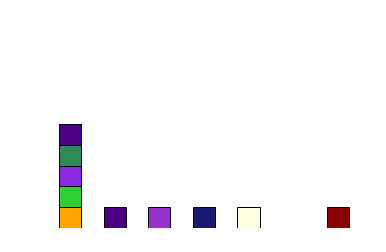

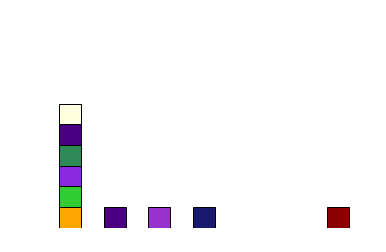

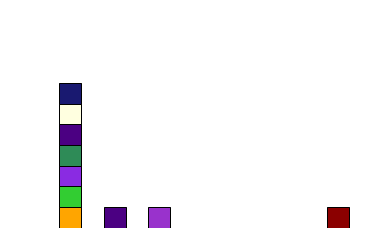

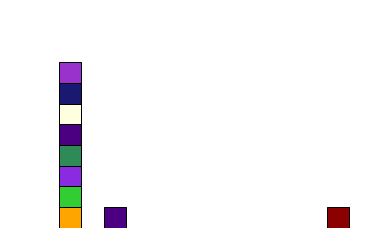

T: No, now you cannot put b5 in the tower because you must put red blocks on blue blocks


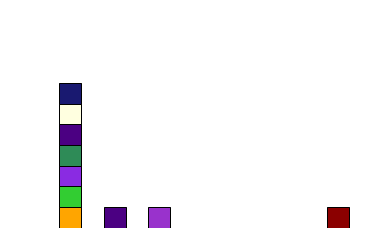

0.523050940047268 [('b0', 'blue'), ('b2', 'blue'), ('b5', 'red')]


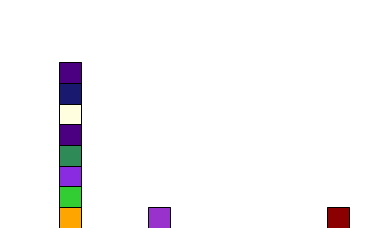

T: No, now you cannot put b5 in the tower because you must put red blocks on blue blocks


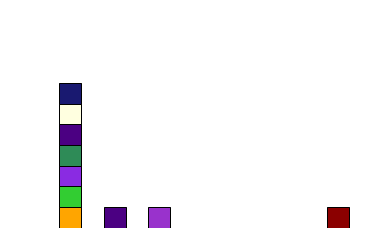

0.5230509400472764 [('b0', 'blue'), ('b2', 'blue'), ('b5', 'red')]


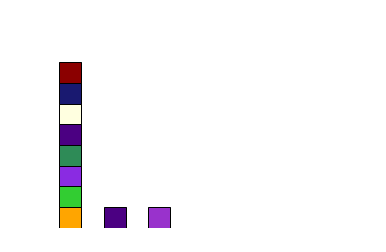

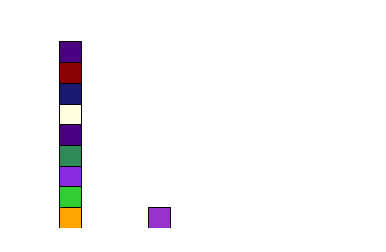

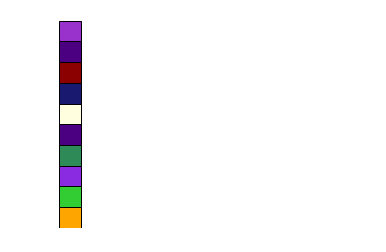

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem27.pddl
1.0629059718425824 [('b3', 'red'), ('b4', 'red'), ('b6', 'blue'), ('b7', 'blue')]


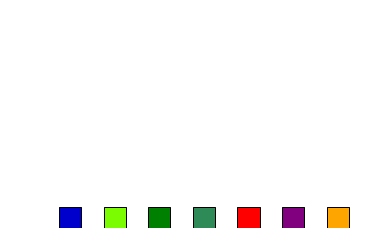

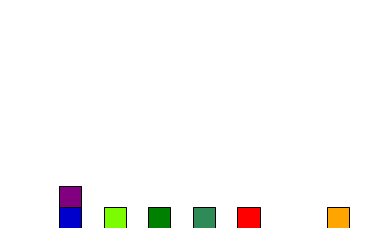

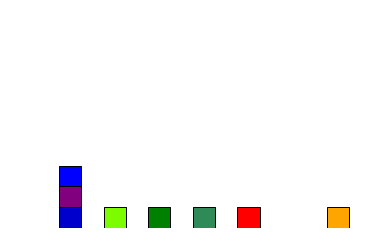

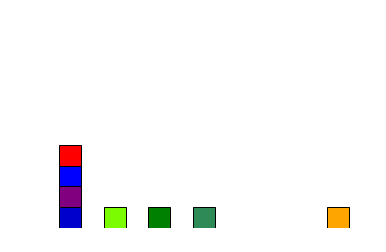

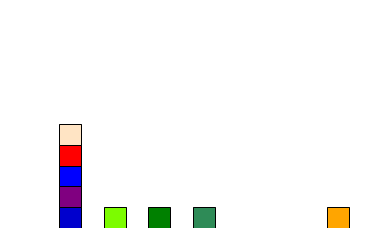

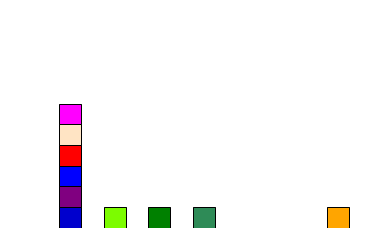

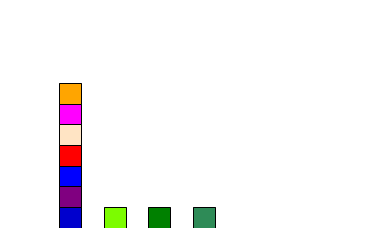

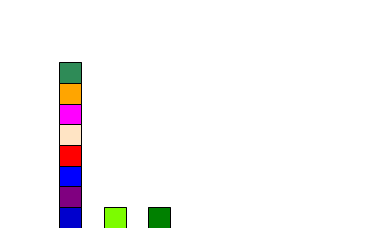

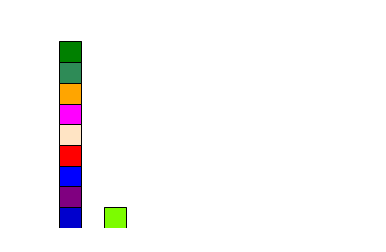

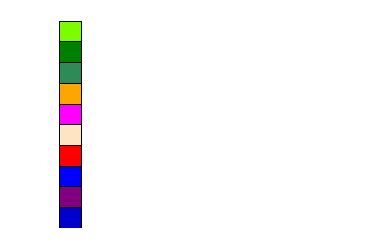

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem28.pddl
0.1781517427375727 [('b8', 'blue')]


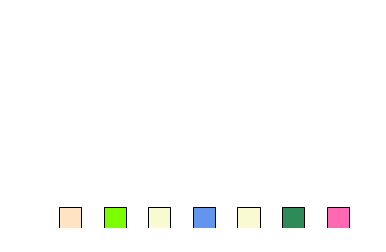

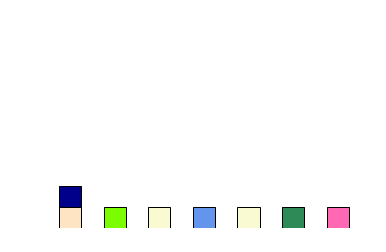

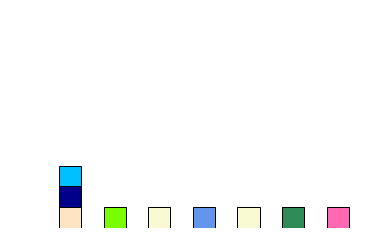

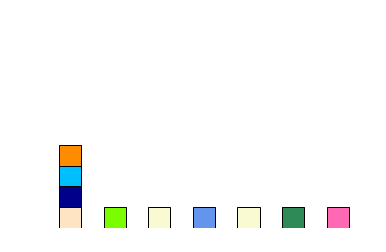

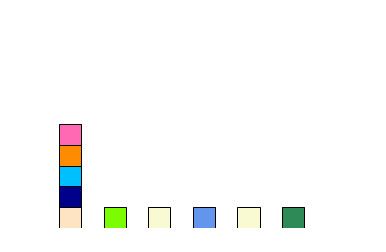

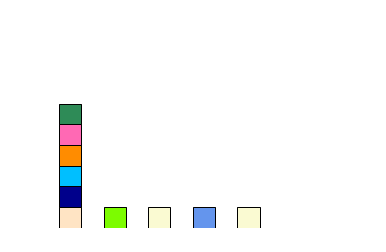

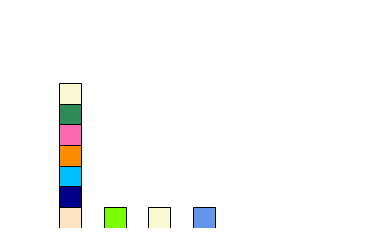

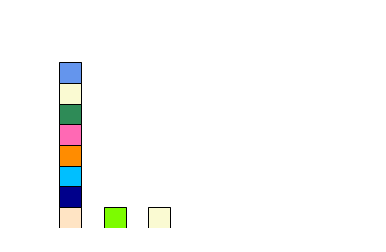

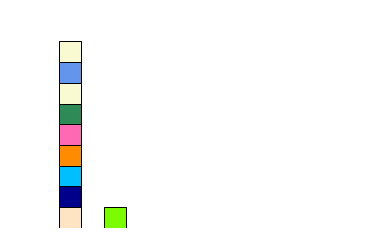

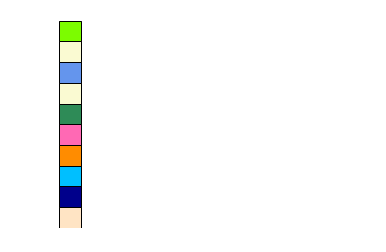

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem29.pddl
0.8246743929188973 [('b4', 'red'), ('b5', 'blue'), ('b6', 'blue')]


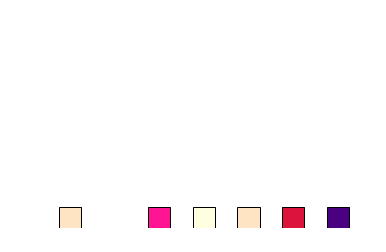

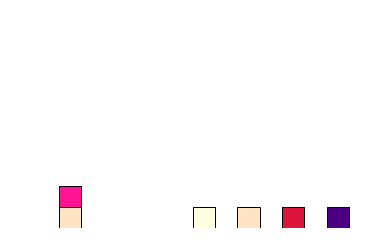

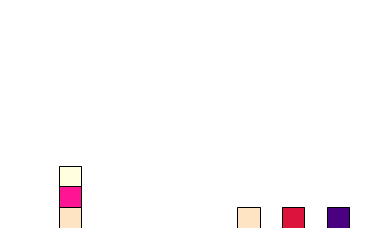

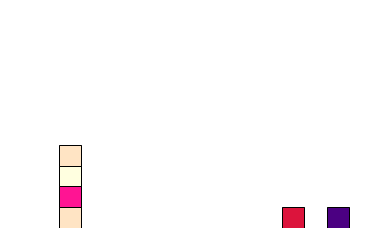

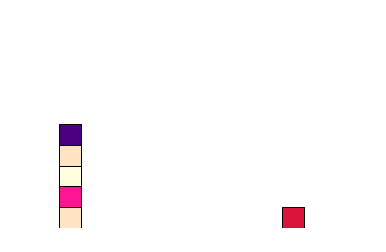

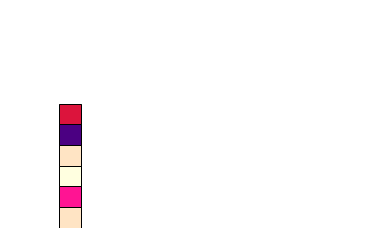

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


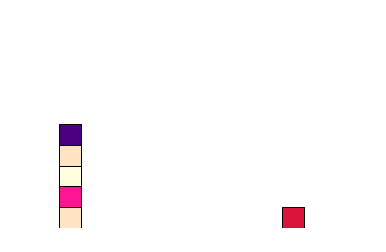

0.5701317540086064 [('b4', 'red'), ('b5', 'blue'), ('b6', 'blue')]


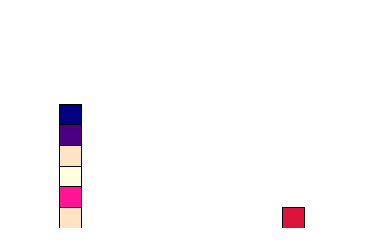

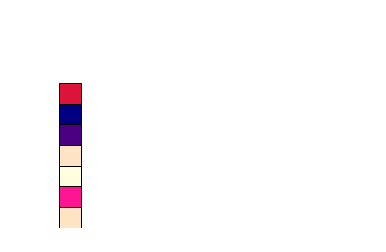

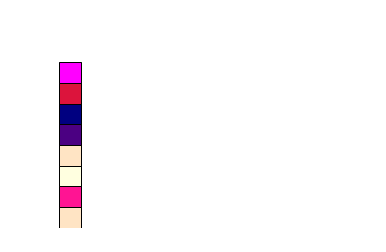

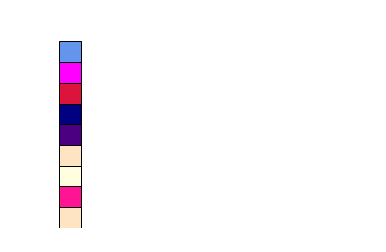

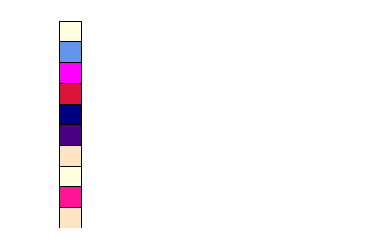

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem3.pddl
1.07522594674644 [('b0', 'blue'), ('b2', 'blue'), ('b4', 'red'), ('b6', 'red'), ('b7', 'blue')]


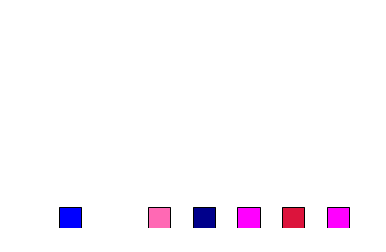

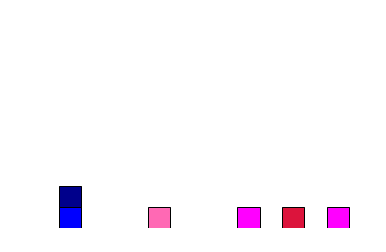

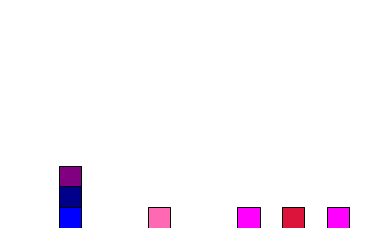

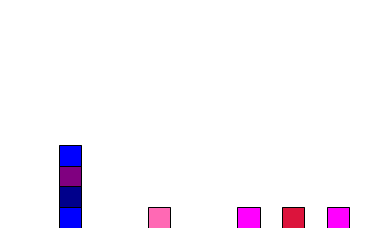

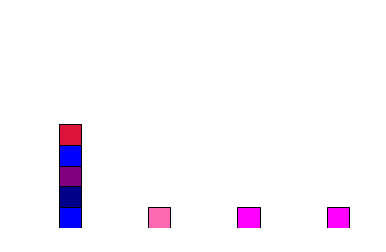

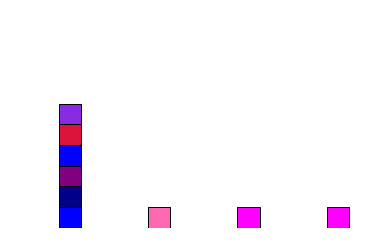

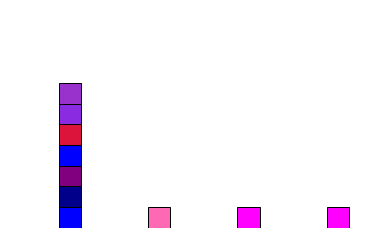

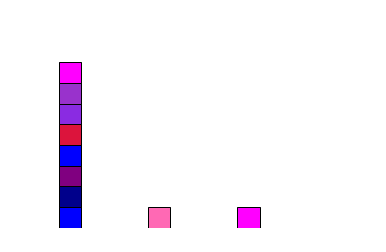

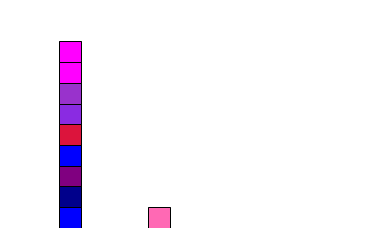

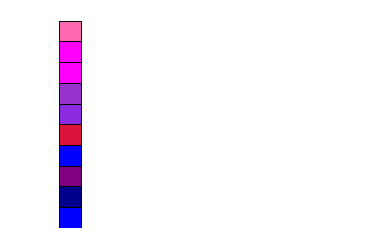

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem30.pddl
1.2328008926695897 [('b1', 'red'), ('b7', 'blue')]


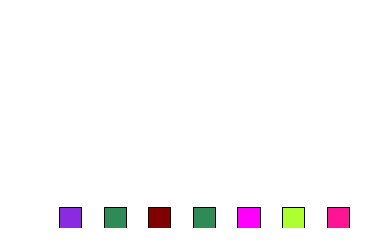

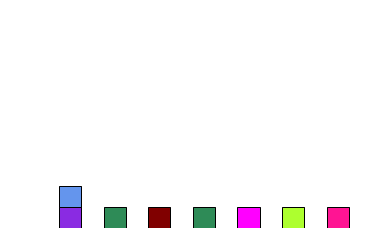

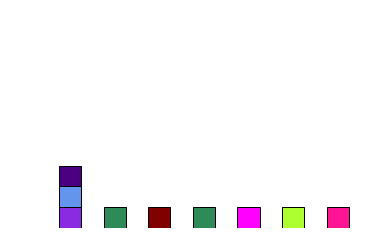

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


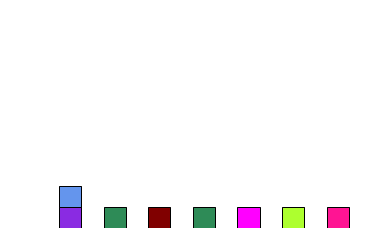

2.175443707668507 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'red'), ('b7', 'blue')]
2.605844254223011 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'blue')]


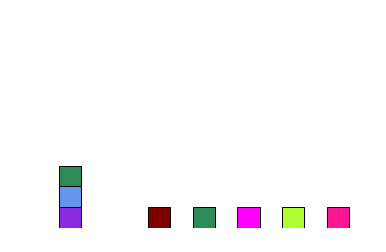

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


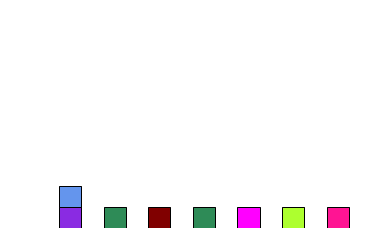

2.1754440092864744 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'red'), ('b7', 'blue')]
2.605845707292921 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'blue')]


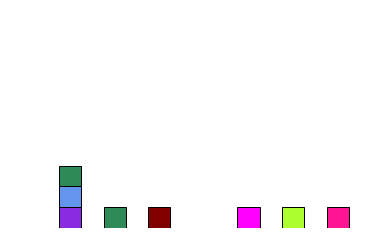

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


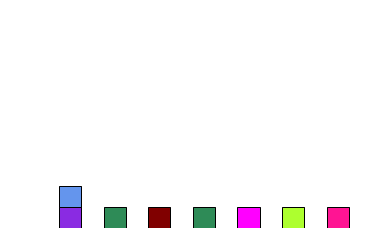

2.1754440092864744 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'red'), ('b7', 'blue')]
2.6058457072929224 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'blue')]


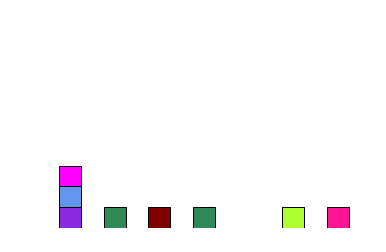

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


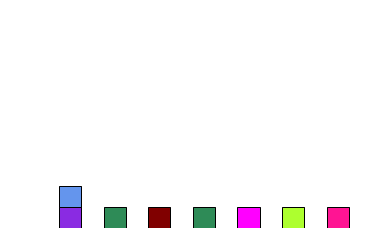

2.1754440092864744 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'red'), ('b7', 'blue')]
2.6058457072929224 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'blue')]


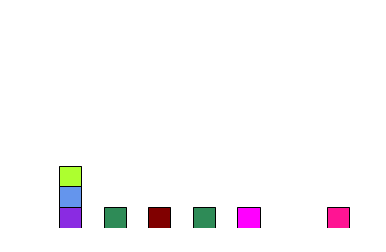

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


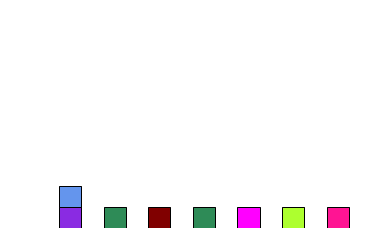

2.1754440092864744 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'red'), ('b7', 'blue')]
2.6058457072929224 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'blue')]


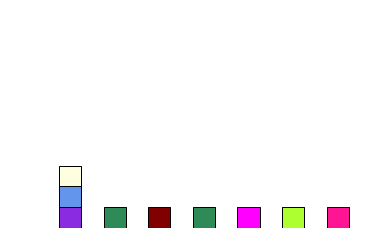

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


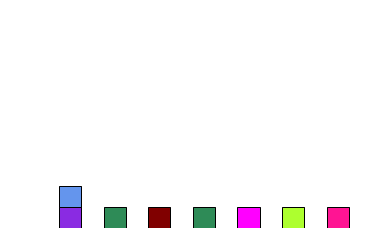

2.1754440092864744 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'red'), ('b7', 'blue')]
2.6058457072929224 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'blue')]
3.2642524994167057 [('b1', 'red'), ('b1', 'blue'), ('b5', 'red'), ('b7', 'red'), ('b7', 'blue'), ('b8', 'blue')]


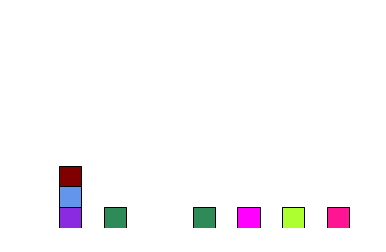

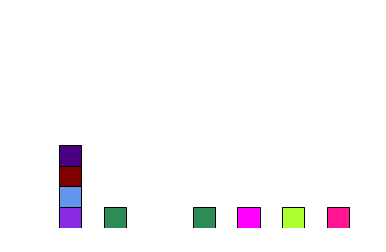

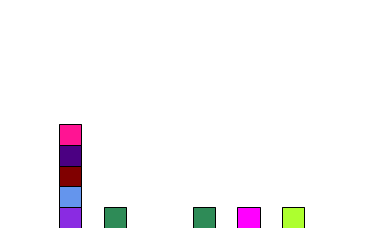

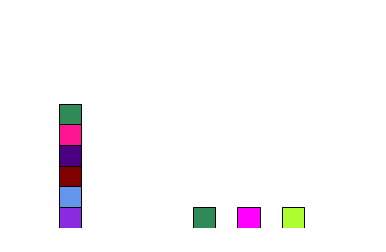

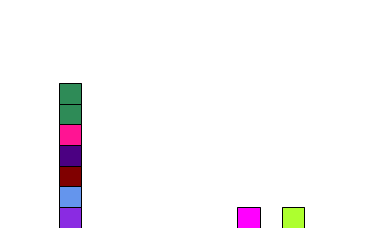

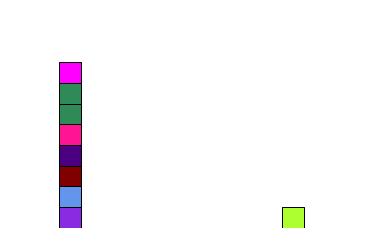

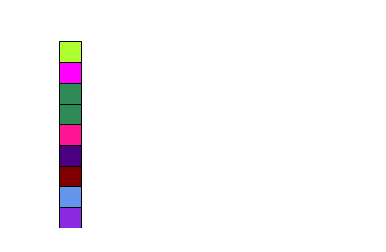

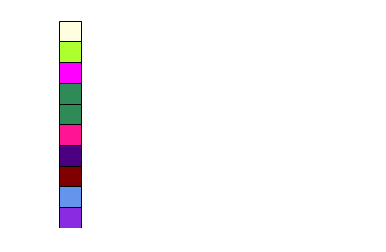

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem31.pddl
1.808199861095892 [('b3', 'red'), ('b3', 'blue'), ('b9', 'red'), ('b9', 'blue')]
2.23860155910234 [('b3', 'red'), ('b3', 'blue'), ('b9', 'blue')]


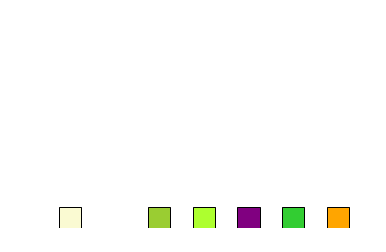

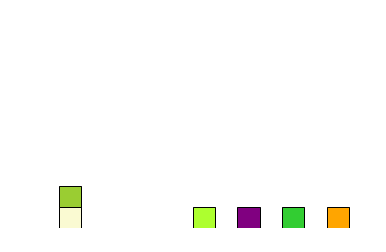

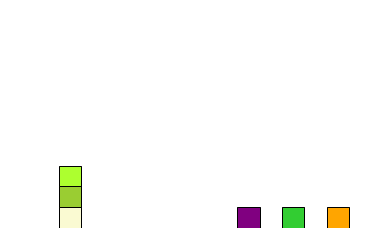

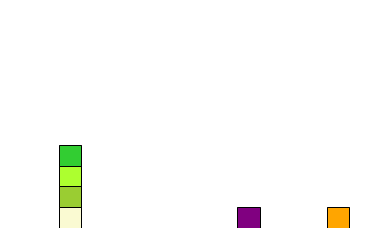

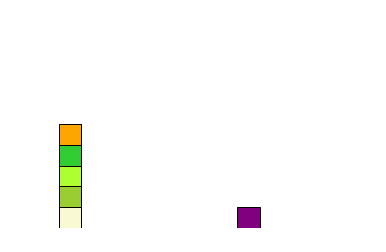

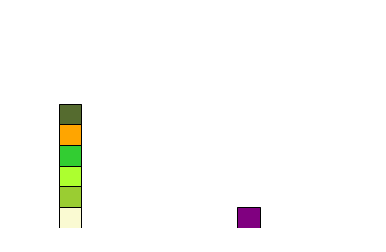

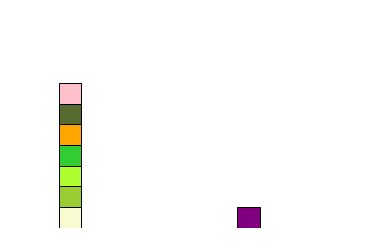

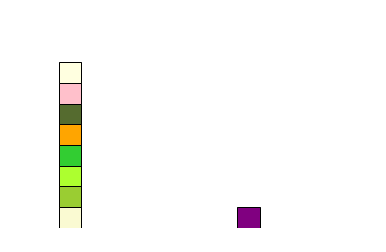

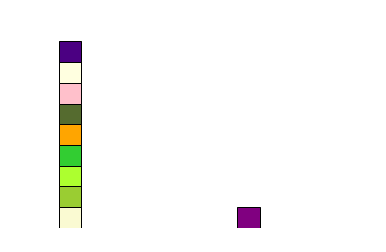

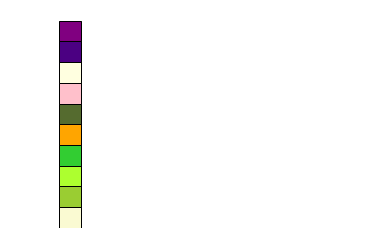

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem32.pddl
2.2689296624929827 [('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b5', 'blue')]


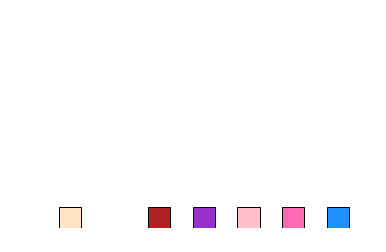

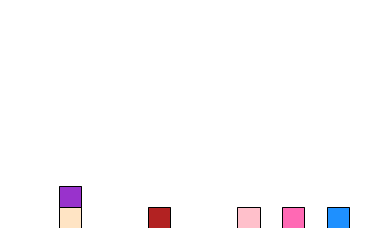

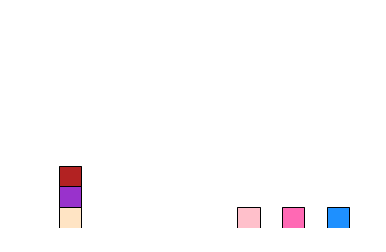

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


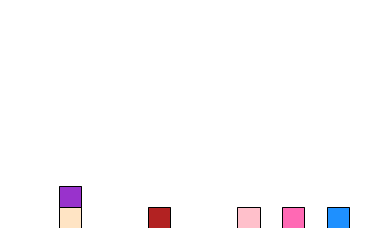

2.270630124138739 [('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b5', 'blue')]


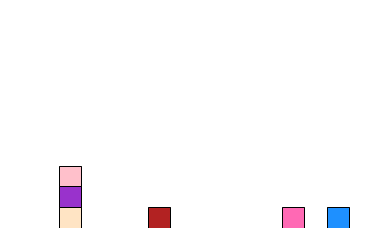

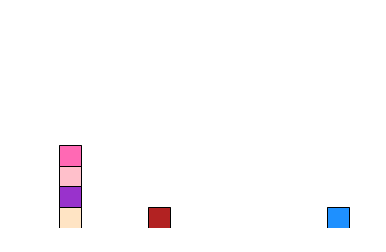

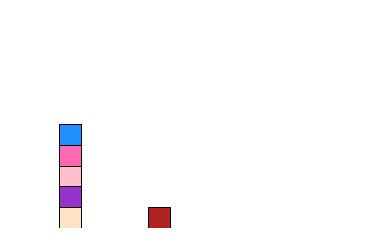

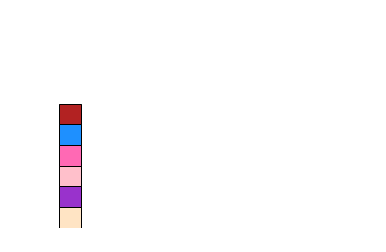

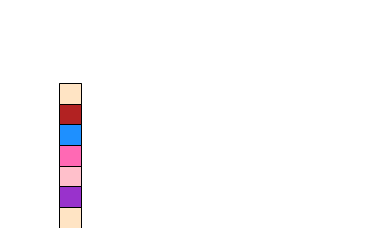

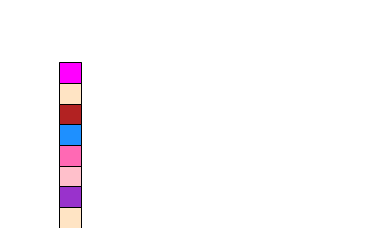

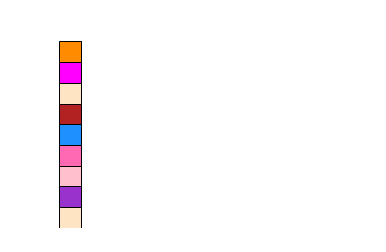

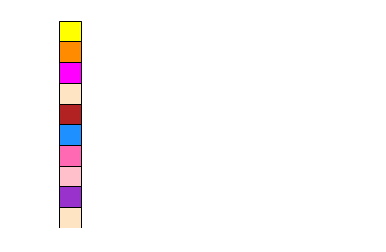

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem33.pddl
3.6323409902516657 [('b0', 'red'), ('b0', 'blue'), ('b1', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b8', 'blue')]


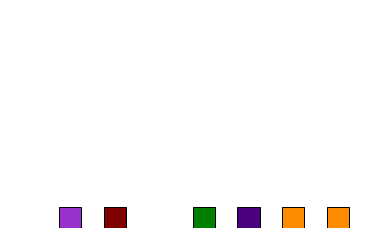

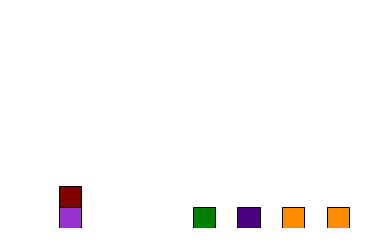

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


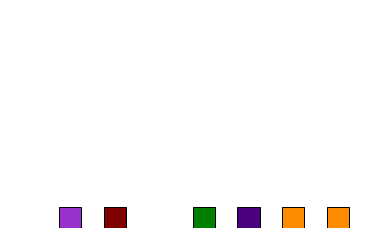

3.5943954172070276 [('b0', 'red'), ('b0', 'blue'), ('b1', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b8', 'blue')]


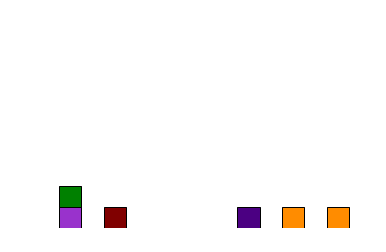

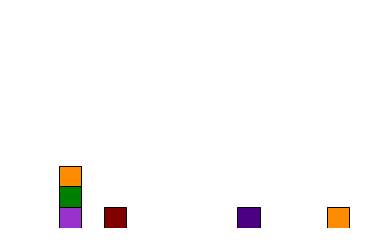

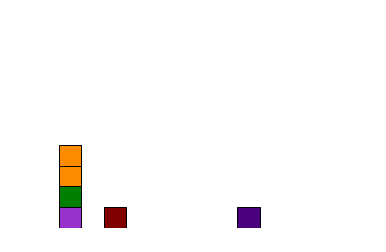

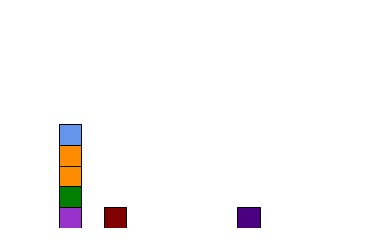

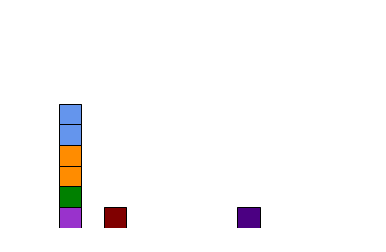

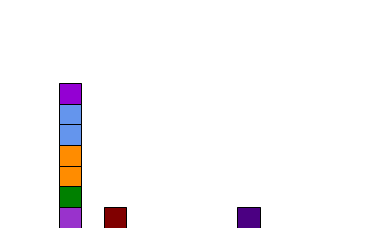

T: No, now you cannot put b0 in the tower because you must put red blocks on blue blocks


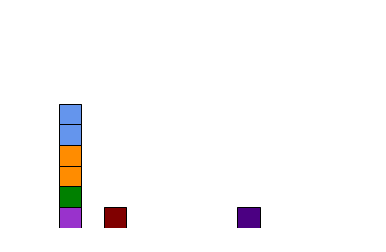

2.0040485600361584 [('b0', 'red'), ('b0', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b7', 'blue'), ('b8', 'blue')]


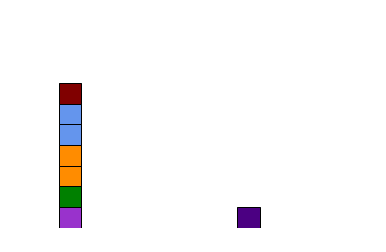

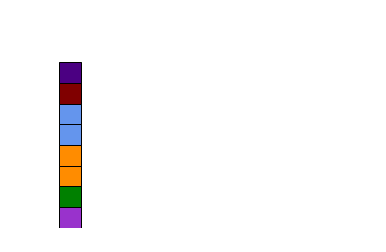

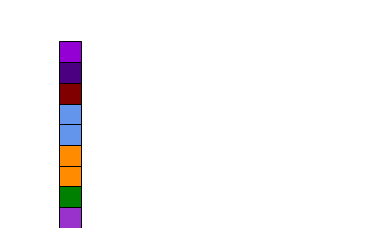

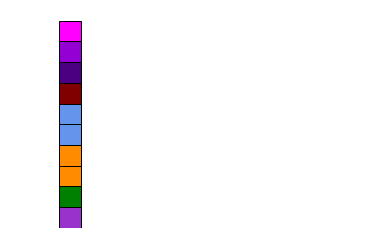

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem34.pddl
2.989900087765641 [('b1', 'blue'), ('b3', 'red'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'blue')]


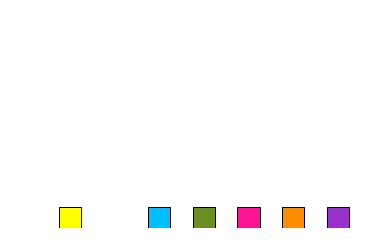

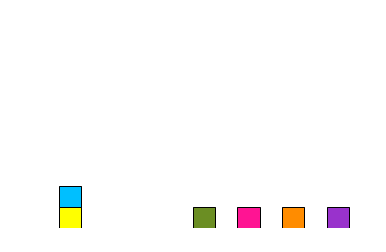

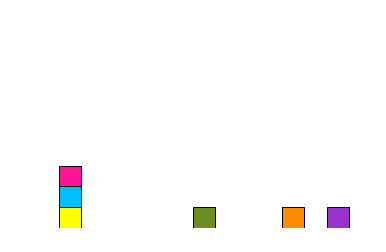

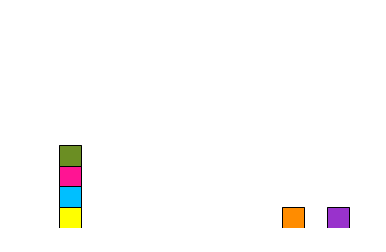

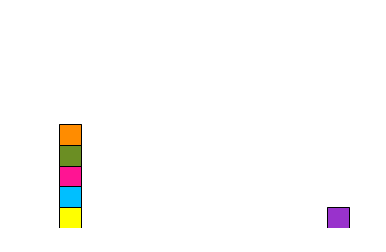

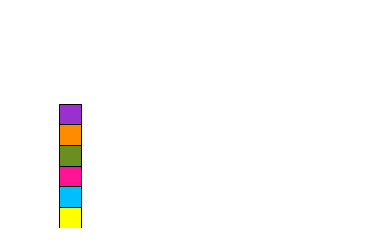

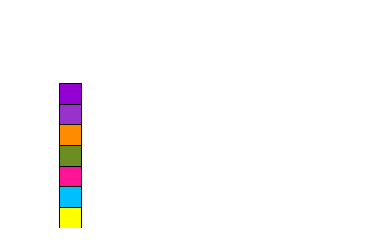

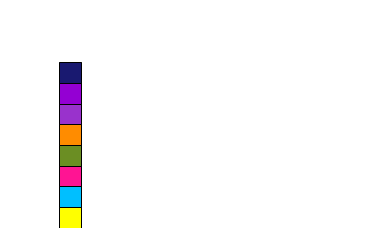

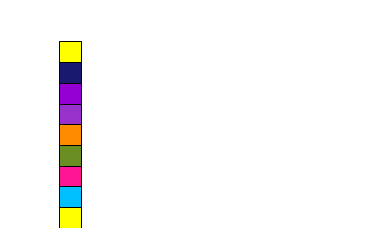

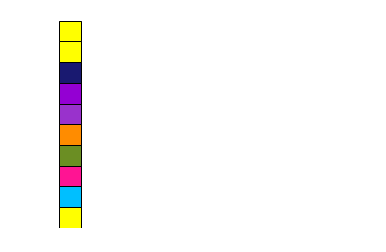

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem35.pddl
1.2547214347798235 [('b1', 'red'), ('b4', 'blue'), ('b6', 'blue'), ('b7', 'blue')]


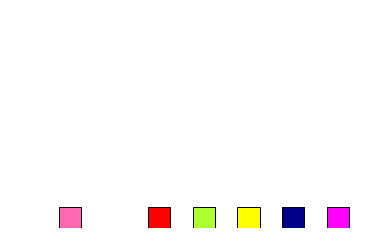

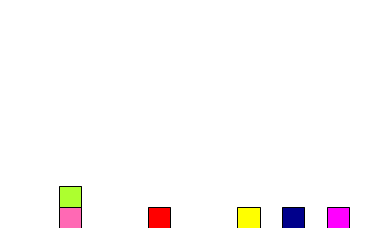

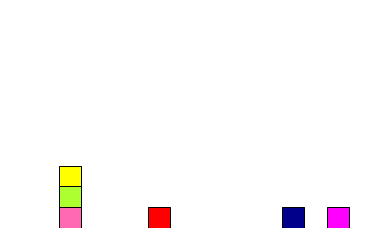

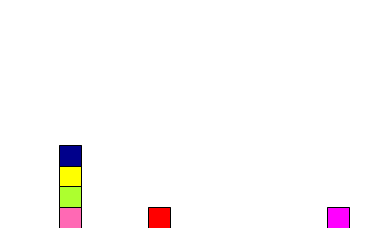

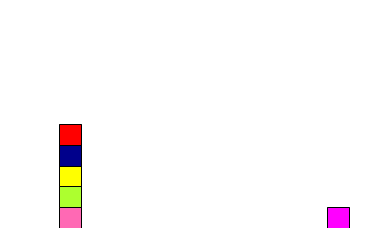

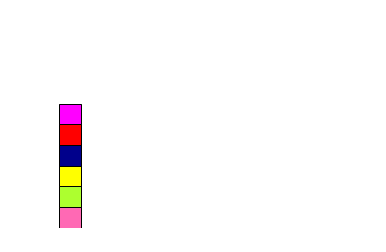

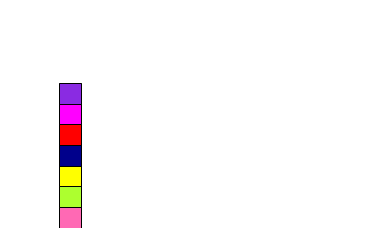

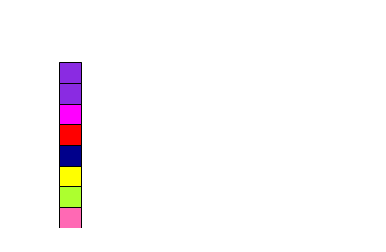

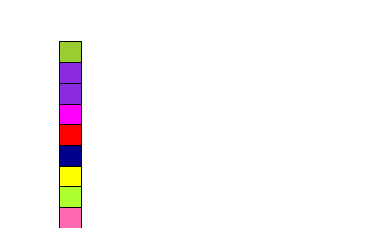

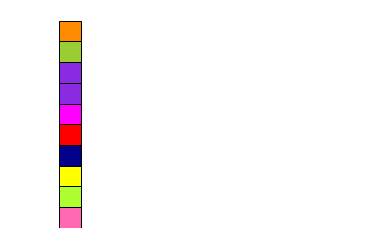

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem36.pddl
3.6030951902766426 [('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b8', 'blue'), ('b9', 'blue')]


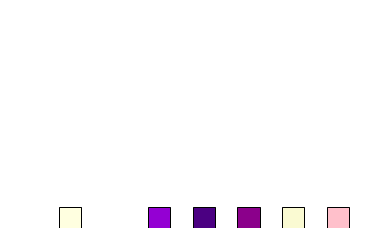

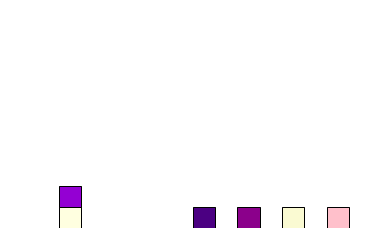

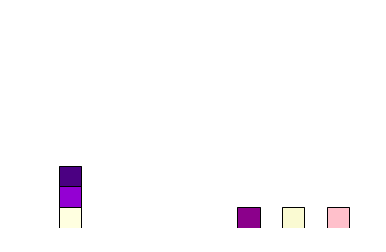

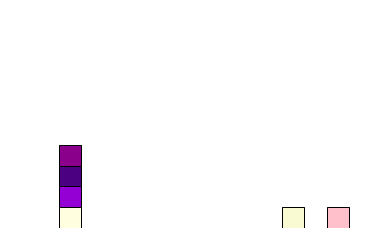

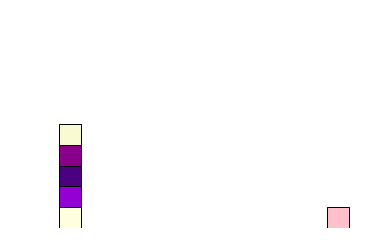

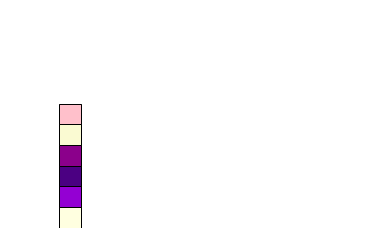

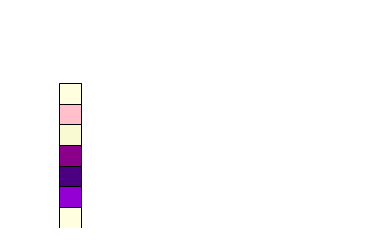

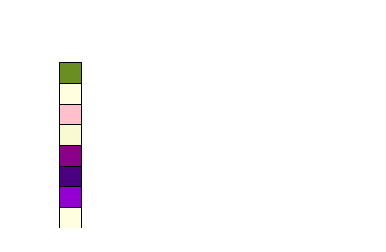

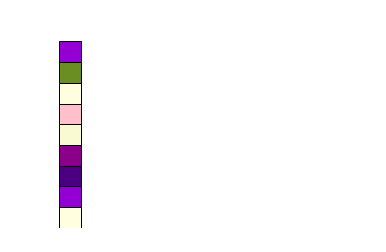

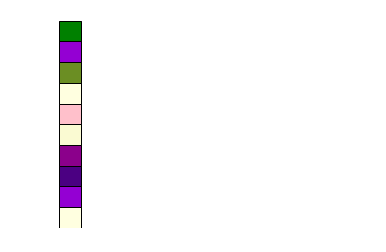

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem37.pddl
1.8267791078548619 [('b1', 'red'), ('b5', 'blue'), ('b8', 'blue')]


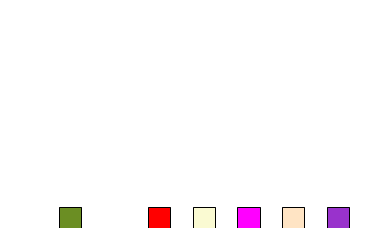

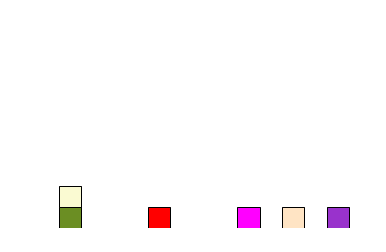

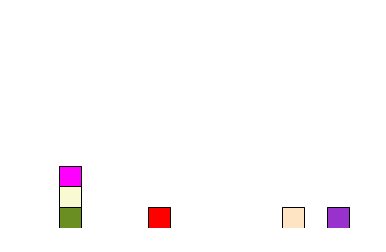

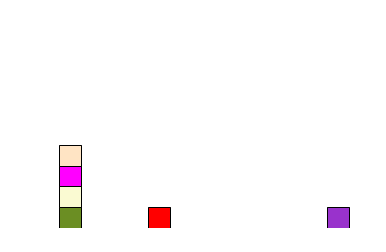

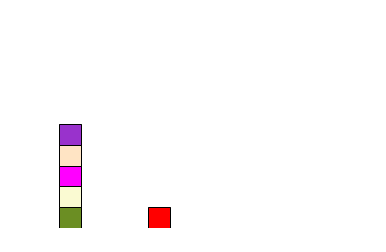

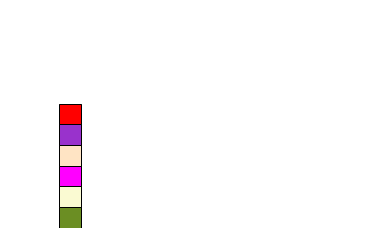

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


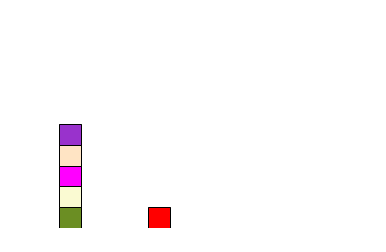

1.0413910084670417 [('b1', 'red'), ('b5', 'blue'), ('b8', 'blue')]


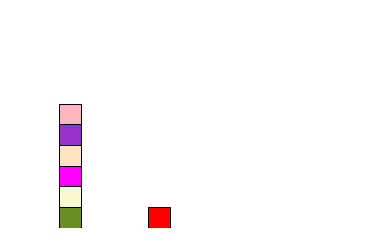

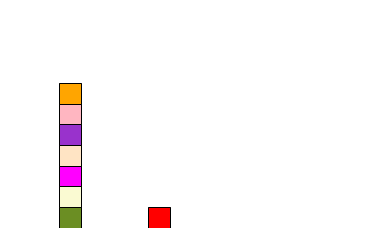

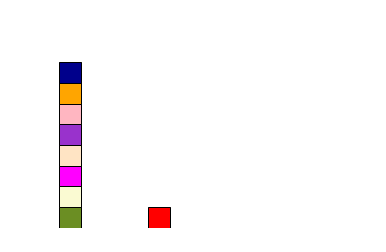

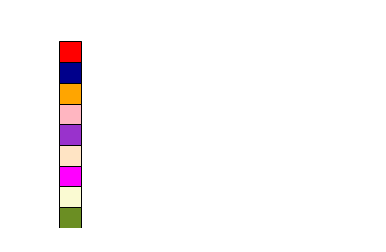

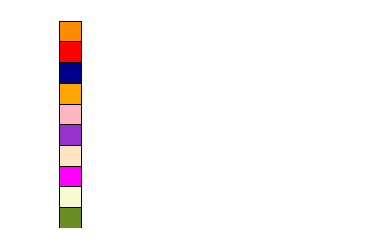

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem38.pddl
4.16055357039428 [('b0', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b7', 'blue')]


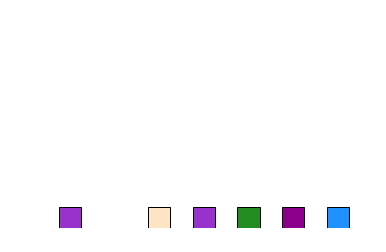

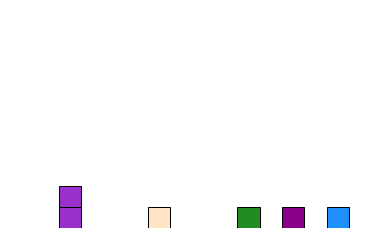

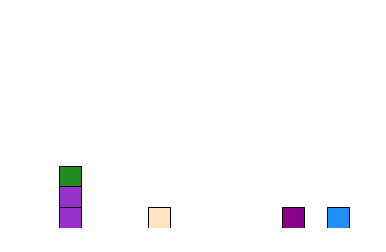

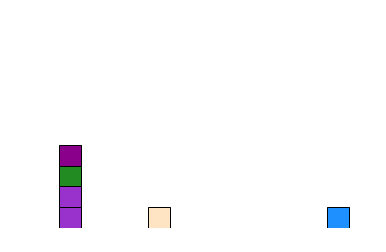

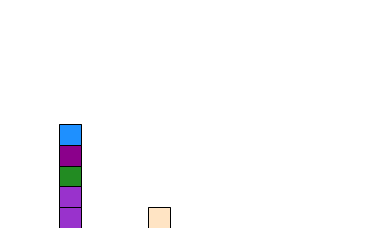

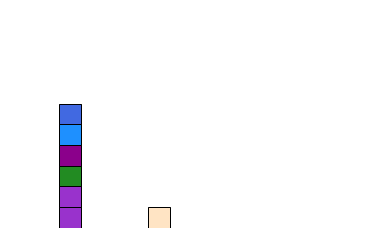

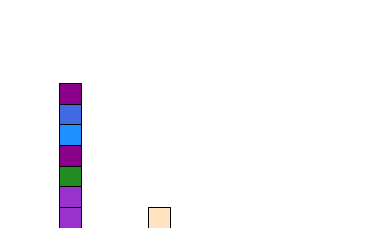

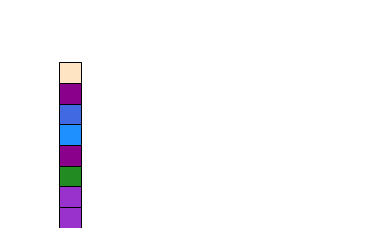

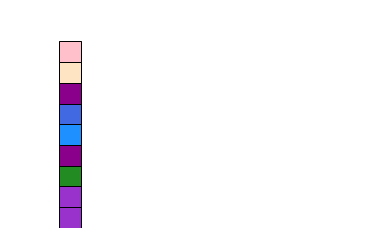

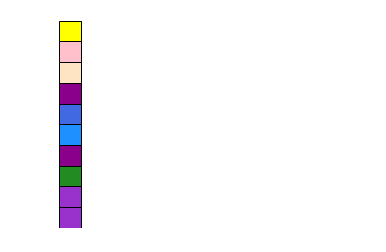

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem39.pddl
2.192555829381986 [('b1', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red')]


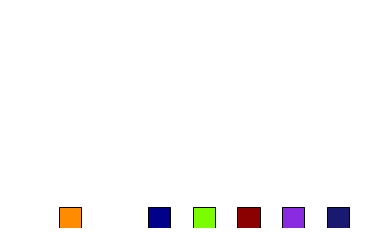

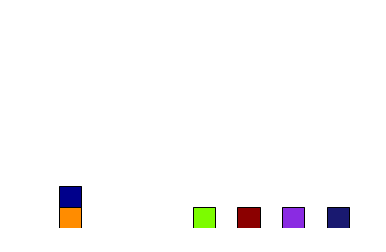

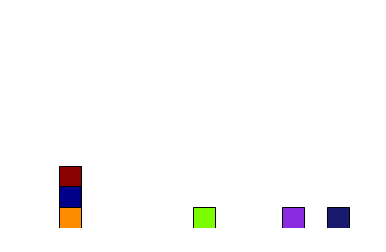

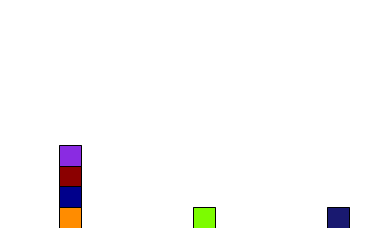

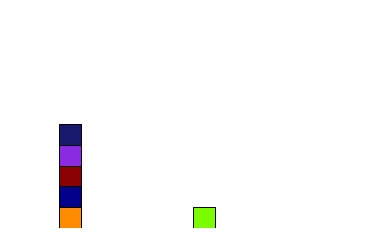

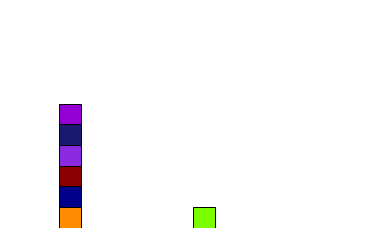

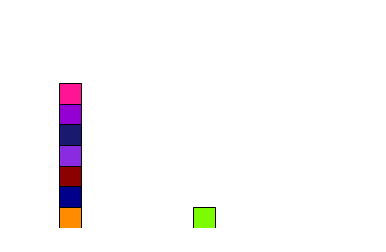

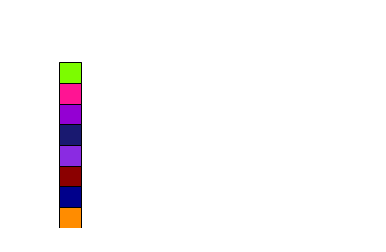

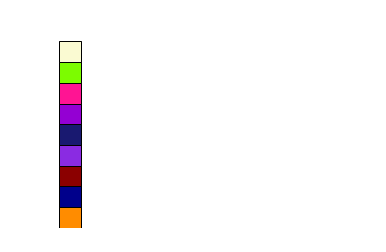

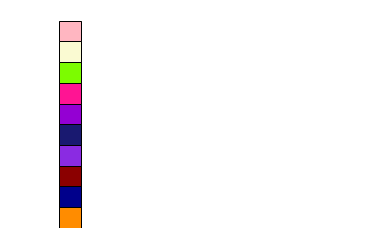

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem4.pddl
2.808523482904497 [('b0', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b6', 'blue'), ('b9', 'blue')]


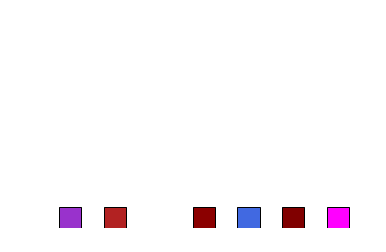

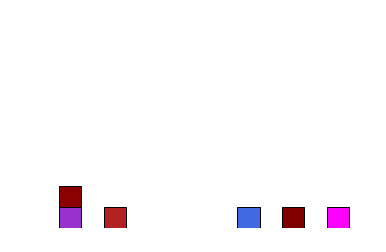

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


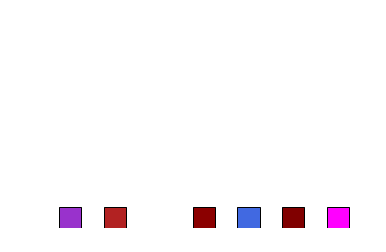

2.7742989317083375 [('b0', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b6', 'blue'), ('b9', 'blue')]


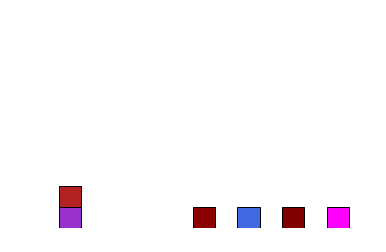

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


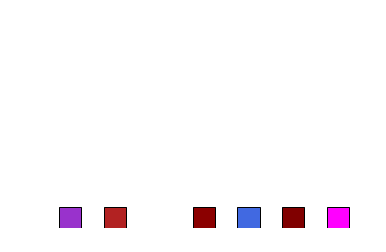

2.7486439015677067 [('b0', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b6', 'blue'), ('b9', 'blue')]


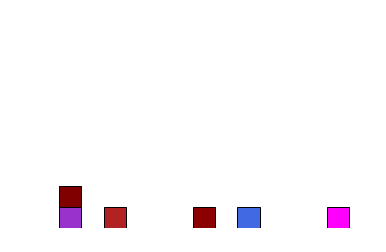

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


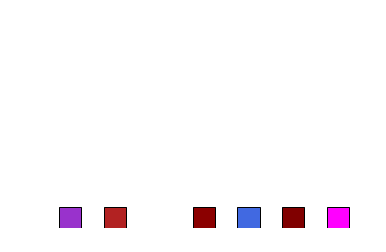

2.7223138778424762 [('b0', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b6', 'blue'), ('b9', 'blue')]


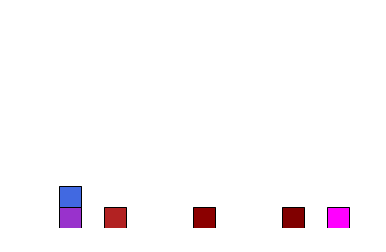

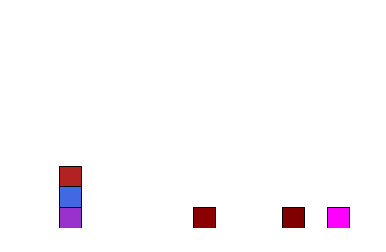

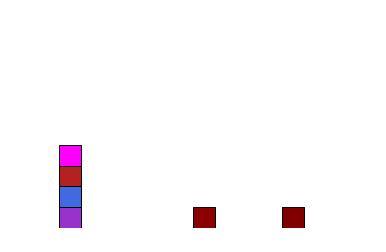

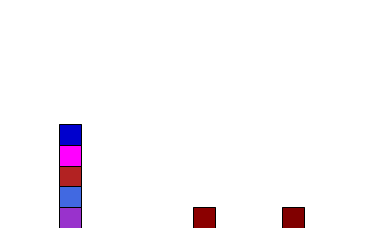

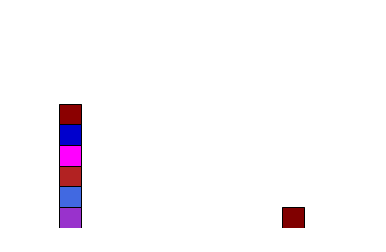

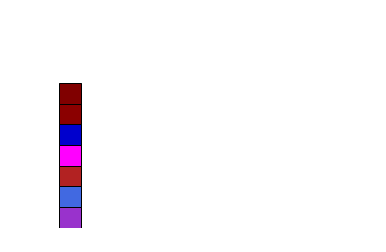

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


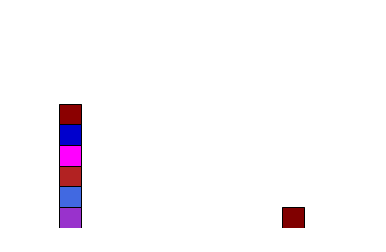

0.9021348631140165 [('b2', 'red'), ('b2', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'blue')]
1.9802598689327322 [('b2', 'red'), ('b2', 'blue'), ('b4', 'red'), ('b4', 'blue')]
3.857294222199685 [('b2', 'red'), ('b2', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'blue'), ('b8', 'blue')]
3.9931362516299505 [('b2', 'red'), ('b2', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'blue'), ('b8', 'red')]
4.334439866288531 [('b2', 'red'), ('b2', 'blue'), ('b4', 'blue'), ('b9', 'blue')]
5.412564872107247 [('b2', 'red'), ('b2', 'blue'), ('b4', 'blue')]
7.2895992253742 [('b2', 'red'), ('b2', 'blue'), ('b4', 'blue'), ('b9', 'blue'), ('b8', 'blue')]
7.425441254804465 [('b2', 'red'), ('b2', 'blue'), ('b4', 'blue'), ('b9', 'blue'), ('b8', 'red')]
7.813007181752205 [('b2', 'blue'), ('b4', 'blue'), ('b9', 'blue')]


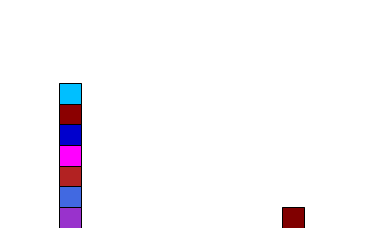

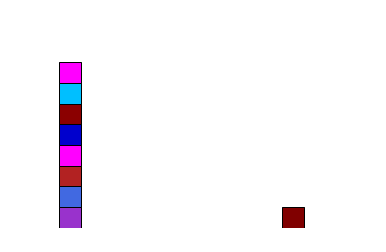

T: No, now you cannot put b4 in the tower because you must put red blocks on blue blocks


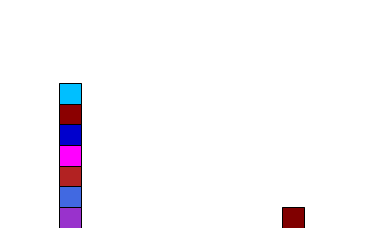

0.6025887596590008 [('b4', 'red'), ('b4', 'blue'), ('b9', 'blue')]


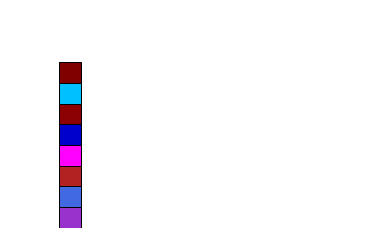

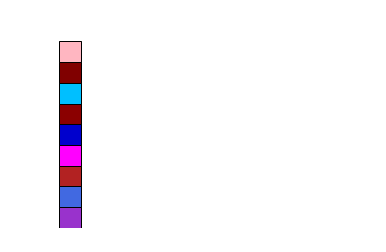

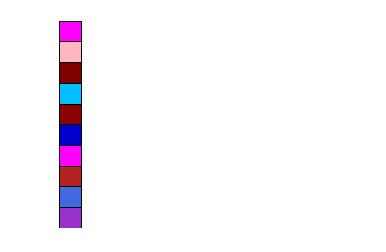

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem40.pddl
2.4415220703108105 [('b1', 'blue'), ('b3', 'blue'), ('b5', 'blue'), ('b6', 'blue')]


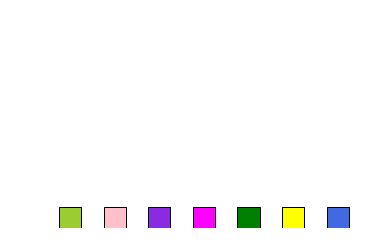

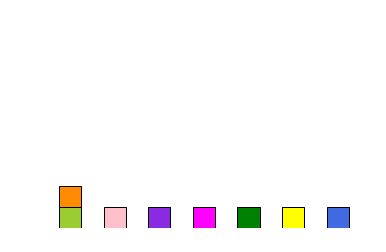

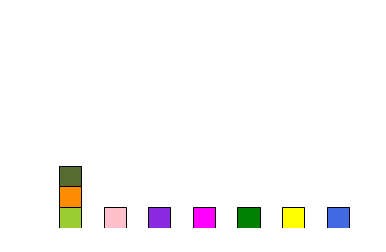

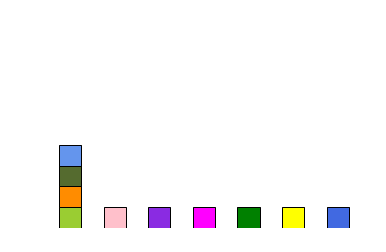

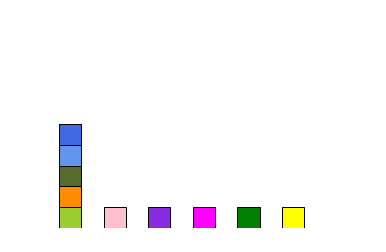

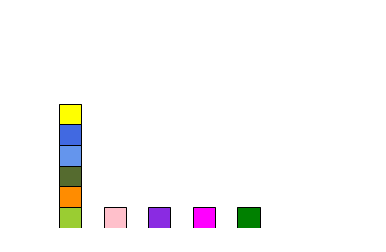

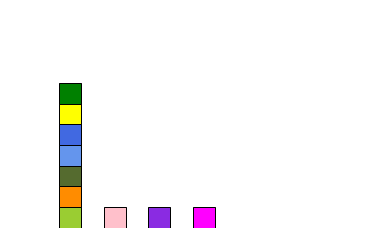

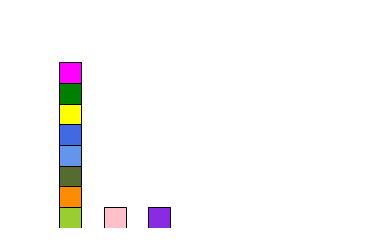

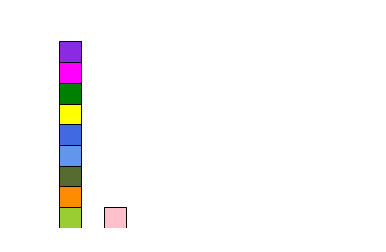

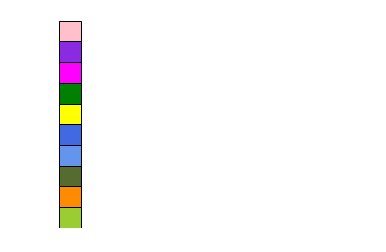

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem41.pddl
1.2424794437643638 [('b1', 'blue'), ('b4', 'blue'), ('b9', 'red')]


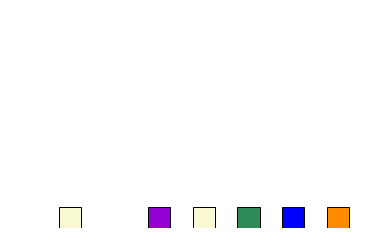

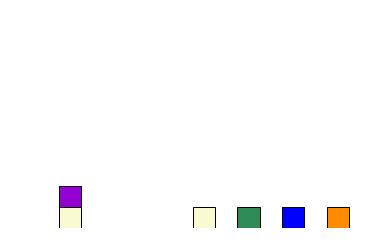

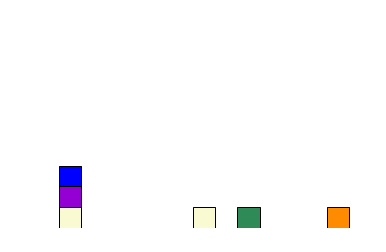

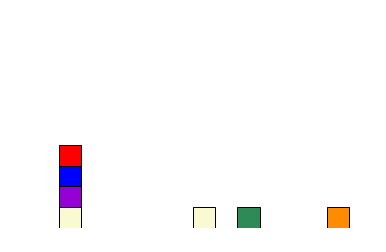

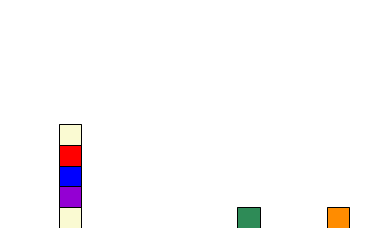

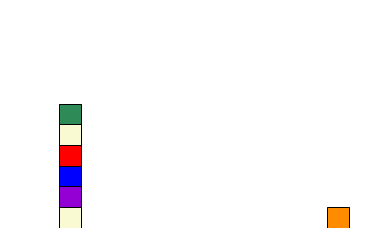

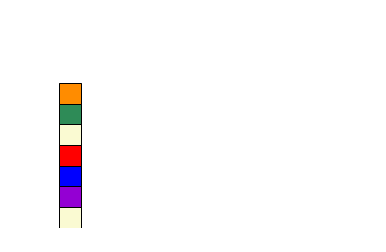

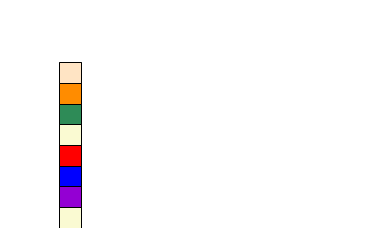

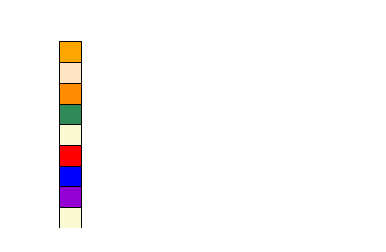

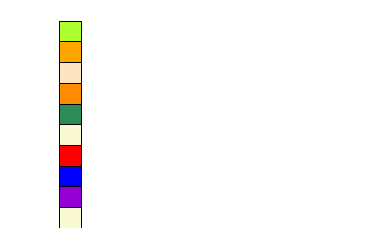

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem42.pddl
1.1499471803124173 [('b0', 'blue'), ('b1', 'blue'), ('b4', 'blue')]


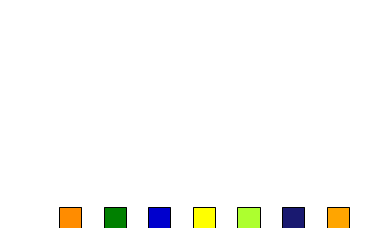

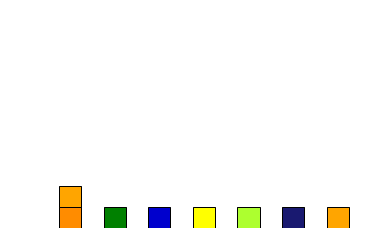

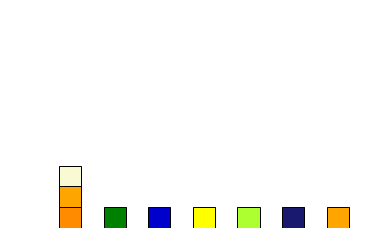

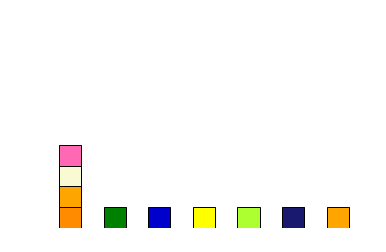

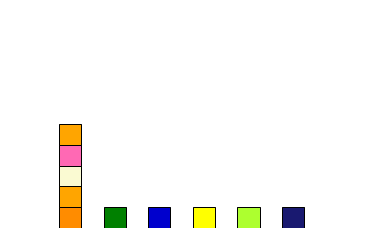

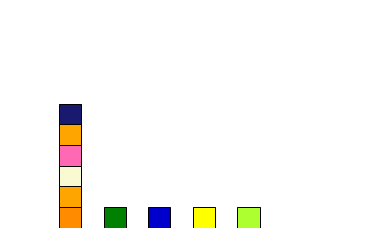

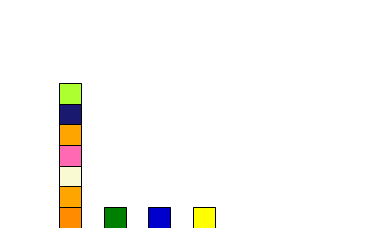

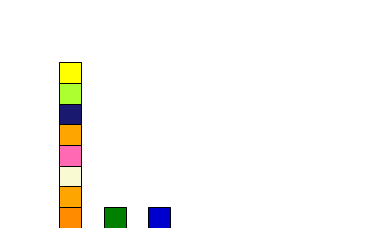

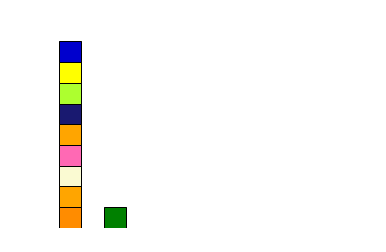

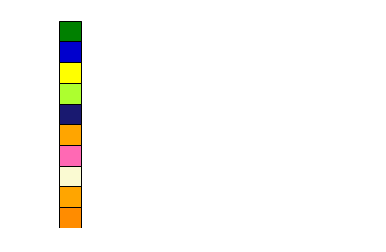

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem43.pddl
2.9459063344104583 [('b0', 'blue'), ('b1', 'blue'), ('b4', 'blue'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'blue'), ('b9', 'blue')]


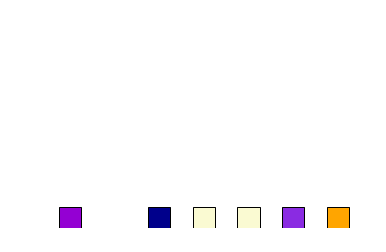

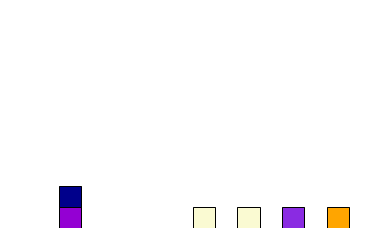

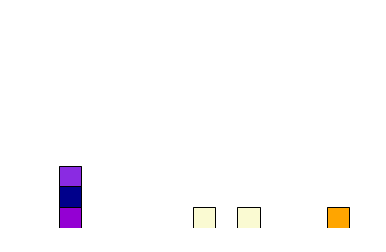

T: No, now you cannot put b6 in the tower because you must put red blocks on blue blocks


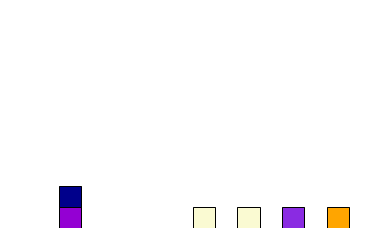

2.359806359252352 [('b1', 'blue'), ('b4', 'blue'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'blue'), ('b9', 'blue')]


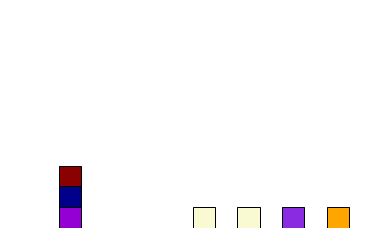

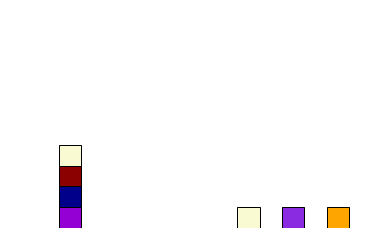

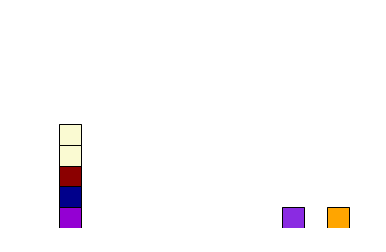

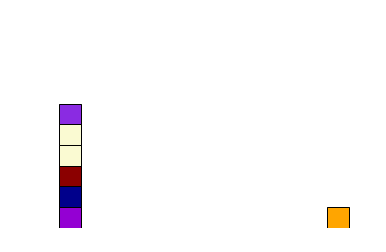

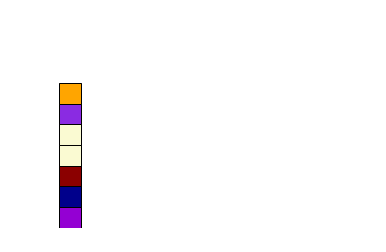

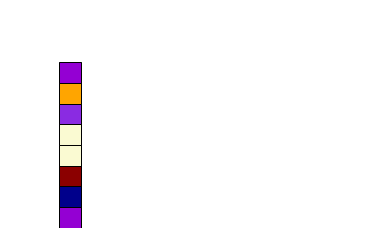

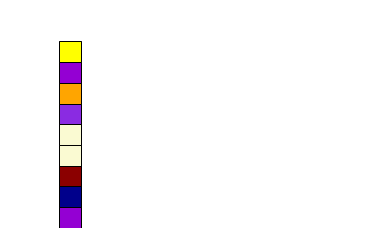

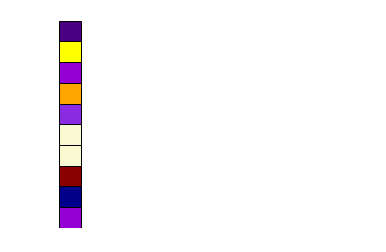

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem44.pddl
2.957078500686502 [('b3', 'blue'), ('b4', 'red'), ('b7', 'blue'), ('b8', 'blue')]


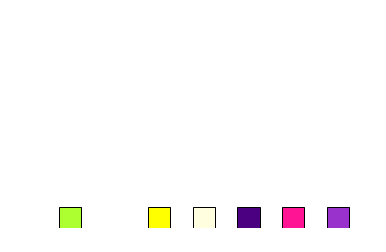

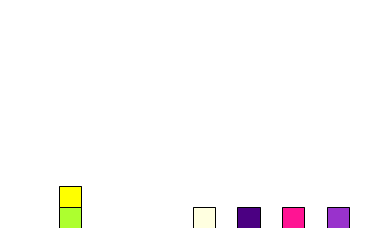

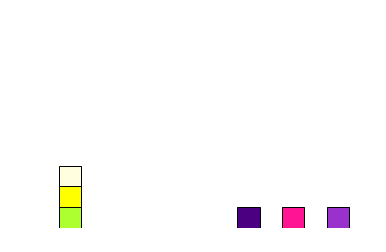

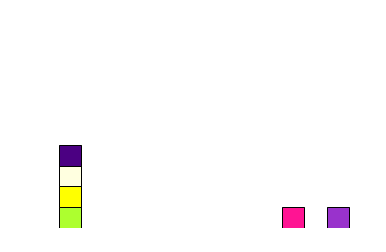

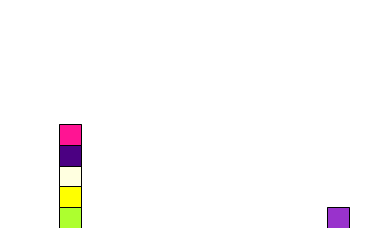

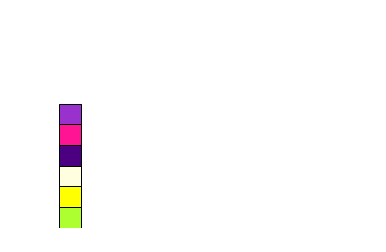

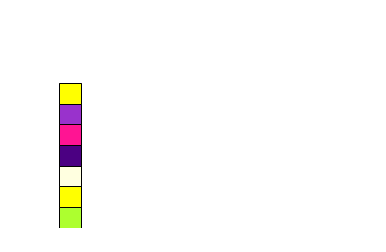

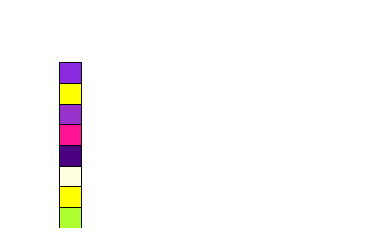

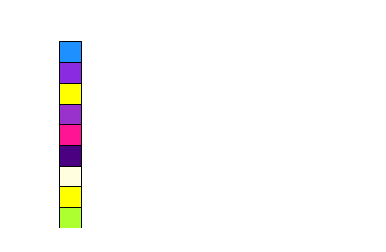

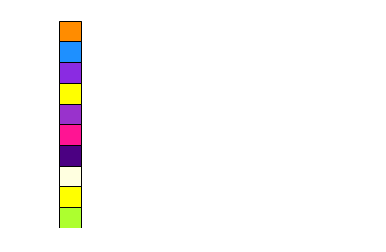

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem45.pddl
2.446152963028318 [('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b6', 'blue'), ('b7', 'blue'), ('b9', 'red')]


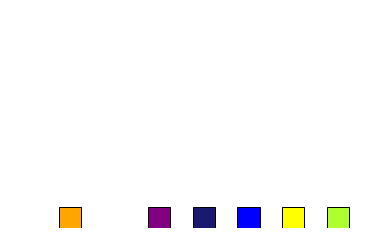

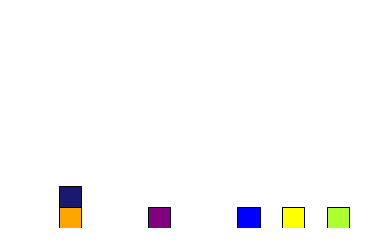

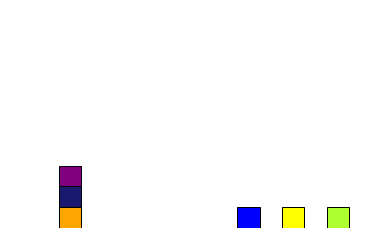

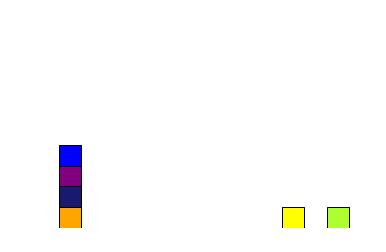

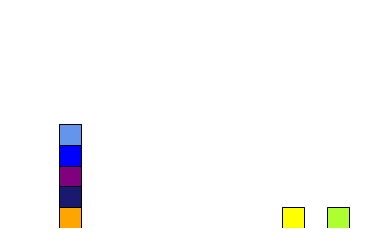

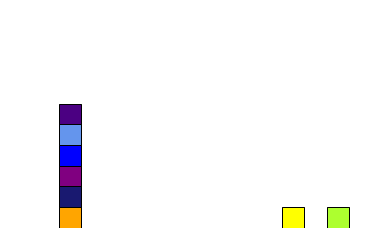

T: No, now you cannot put b9 in the tower because you must put red blocks on blue blocks


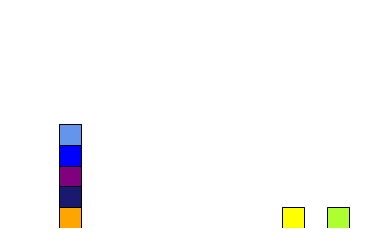

1.2279564328325152 [('b6', 'blue'), ('b7', 'blue'), ('b9', 'red')]


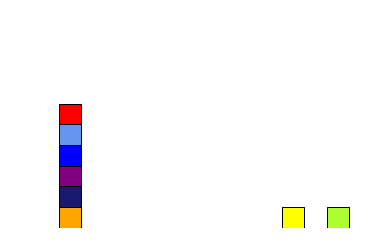

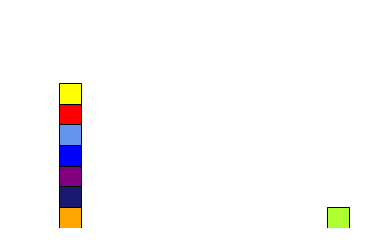

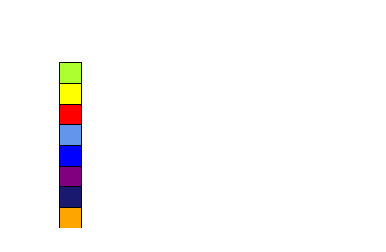

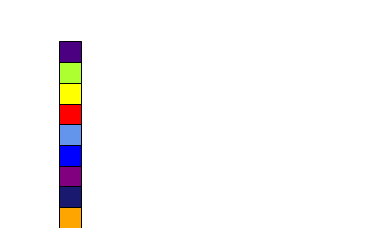

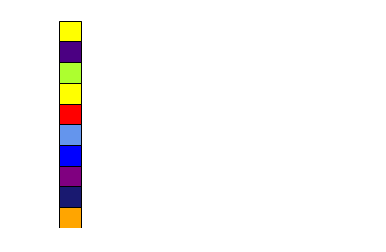

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem46.pddl
3.5776596263696225 [('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b7', 'blue')]


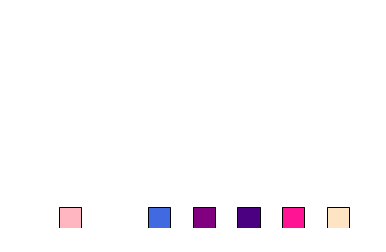

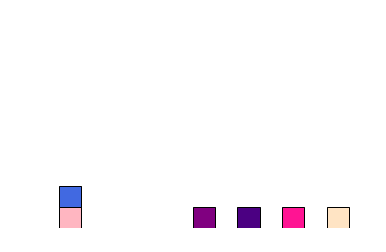

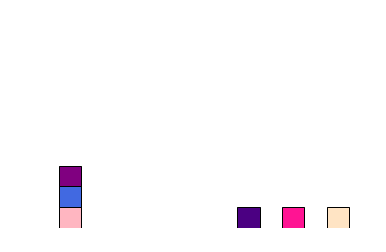

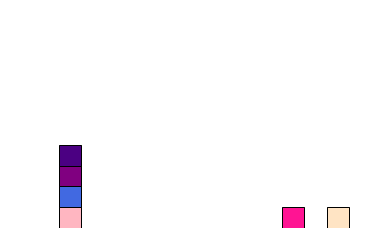

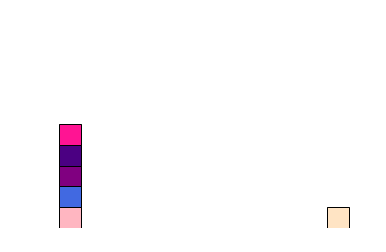

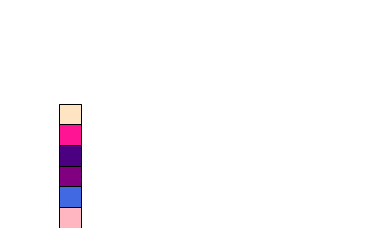

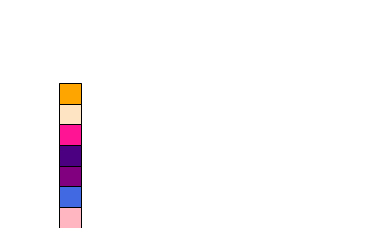

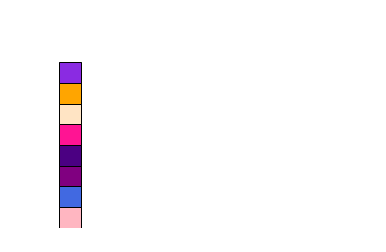

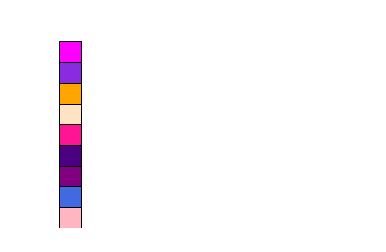

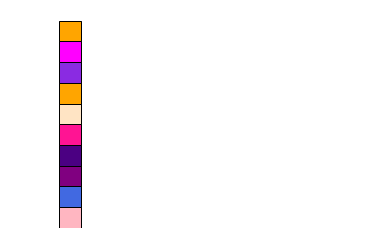

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem47.pddl
3.866981932848749 [('b0', 'blue'), ('b1', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b6', 'blue'), ('b7', 'blue'), ('b9', 'blue')]


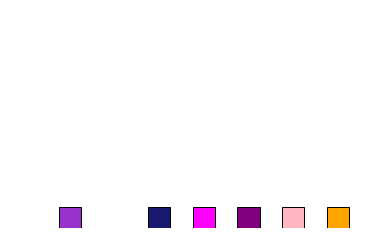

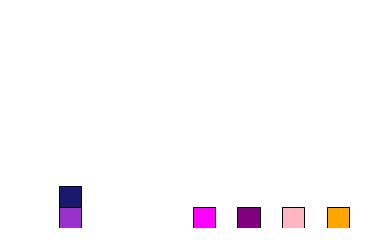

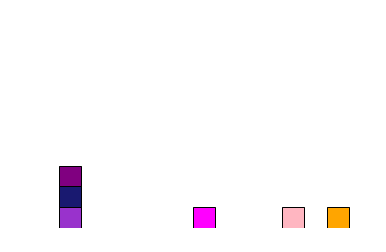

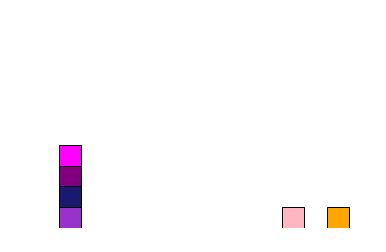

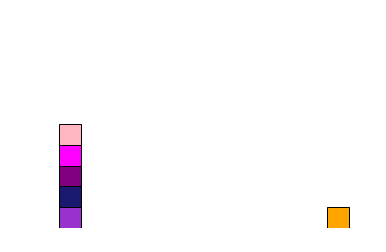

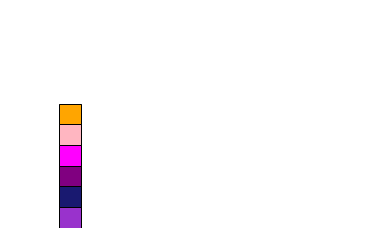

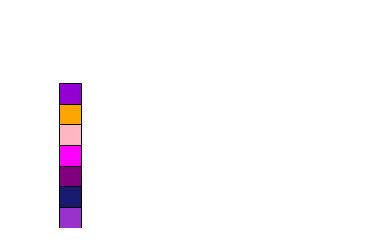

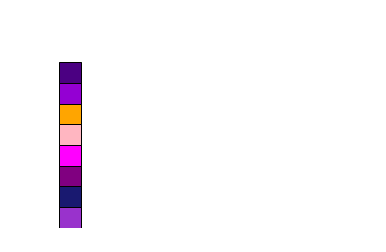

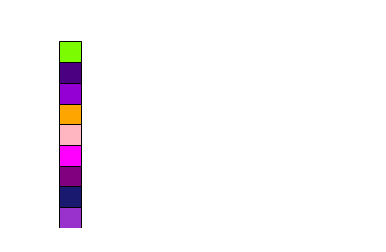

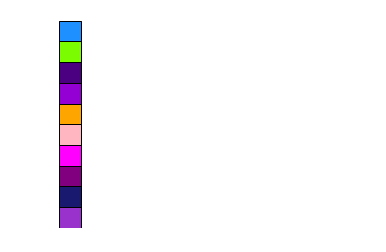

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem48.pddl
3.078064333859496 [('b4', 'blue'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'blue')]


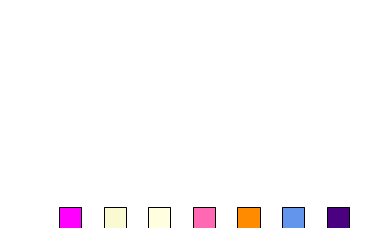

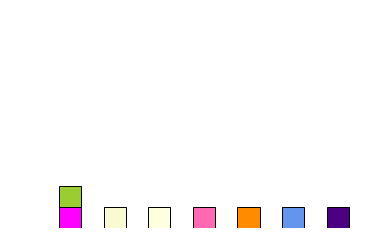

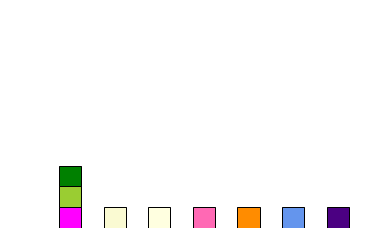

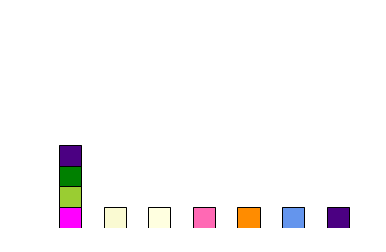

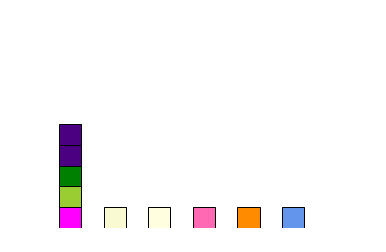

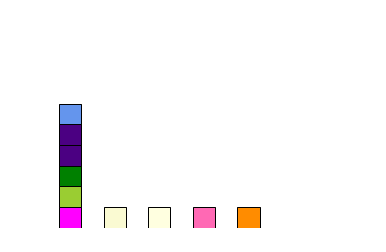

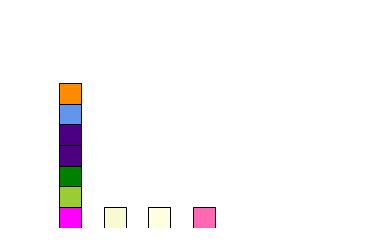

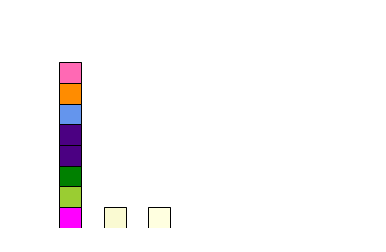

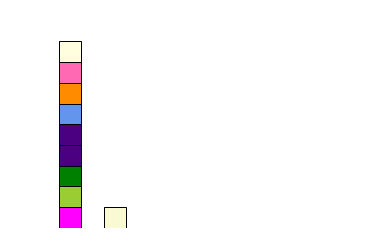

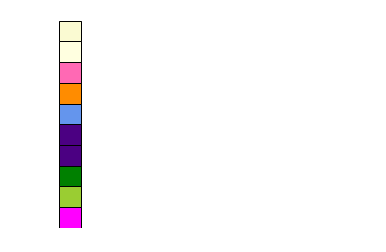

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem49.pddl
3.6862135259051927 [('b1', 'blue'), ('b3', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'red'), ('b6', 'blue'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue')]


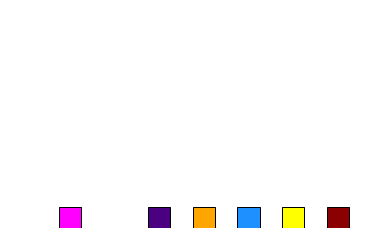

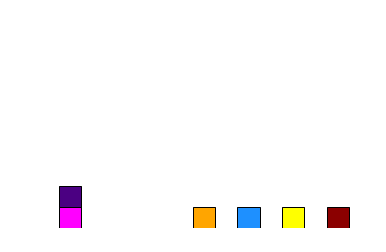

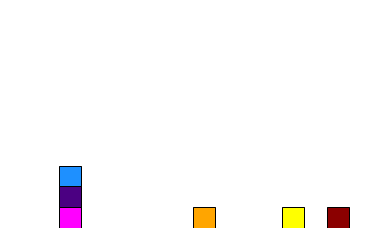

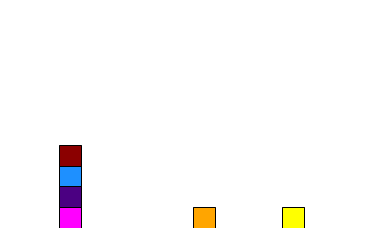

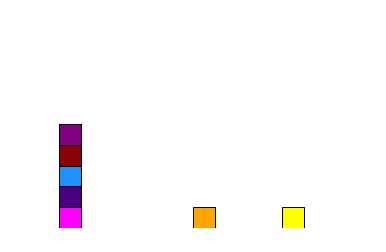

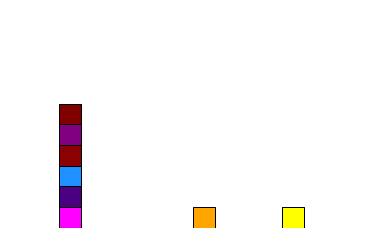

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


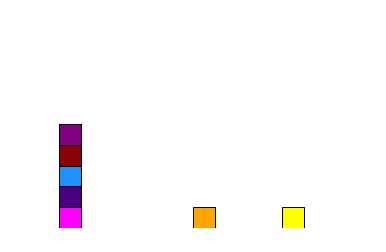

1.8264988406193776 [('b6', 'red'), ('b6', 'blue'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue')]
2.3598510340098606 [('b6', 'red'), ('b6', 'blue'), ('b8', 'red'), ('b9', 'blue')]
2.4425681016850795 [('b6', 'blue'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue')]


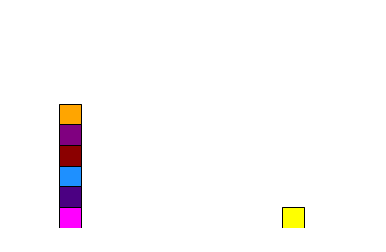

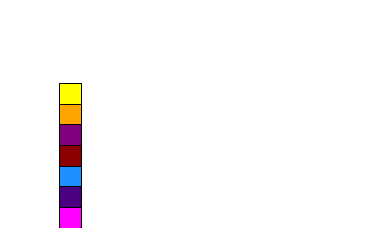

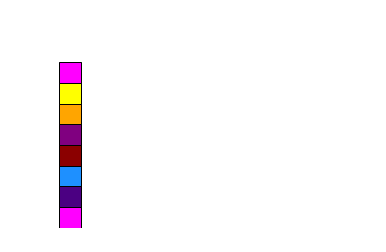

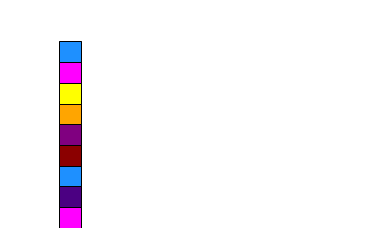

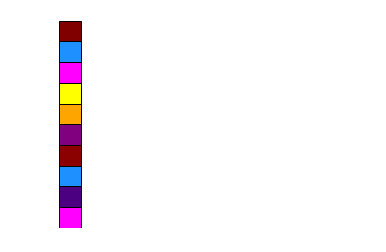

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem5.pddl
2.1154735822202726 [('b0', 'red'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'blue')]


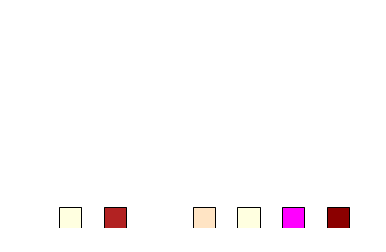

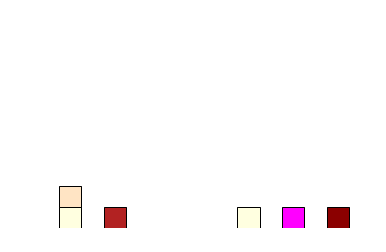

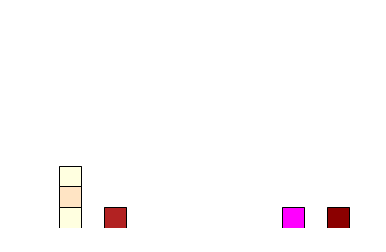

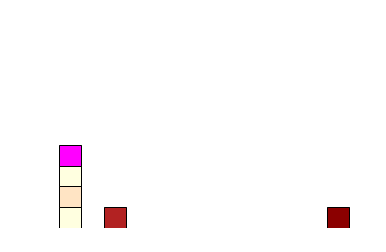

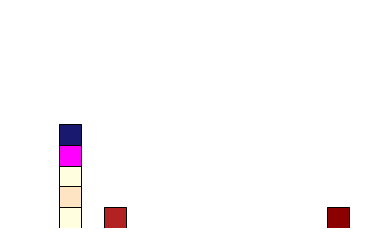

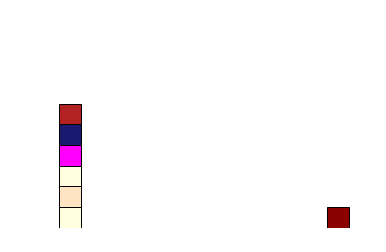

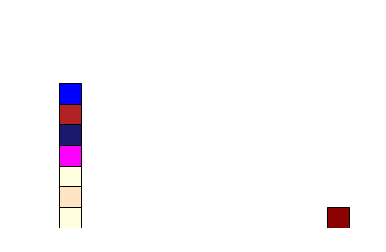

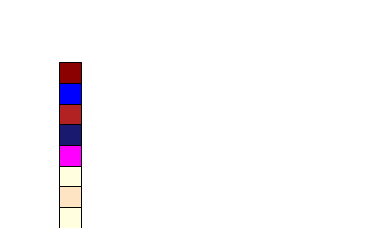

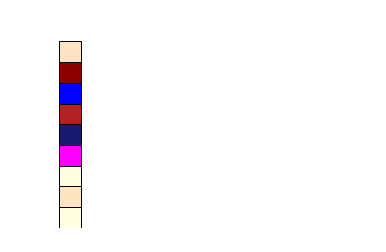

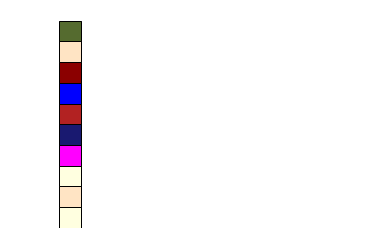

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem50.pddl
2.496638614179201 [('b0', 'blue'), ('b1', 'blue'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'red'), ('b6', 'blue')]


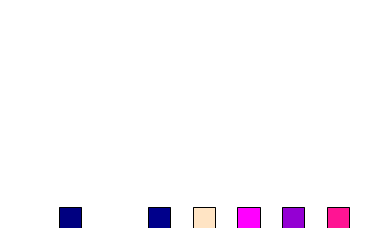

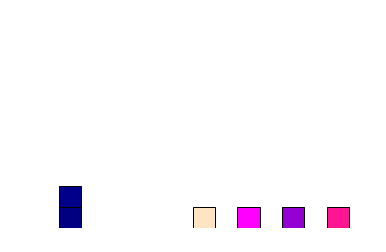

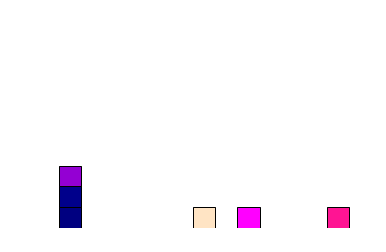

T: No, now you cannot put b6 in the tower because you must put red blocks on blue blocks


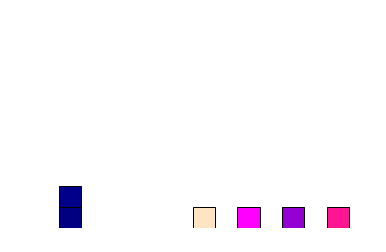

2.2932105654546784 [('b1', 'blue'), ('b4', 'blue'), ('b6', 'red'), ('b6', 'blue')]


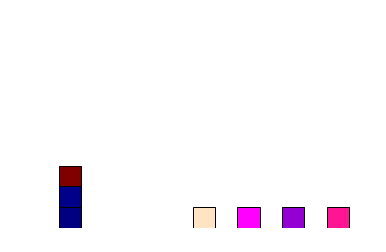

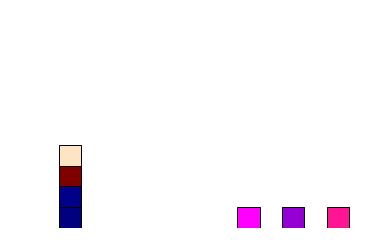

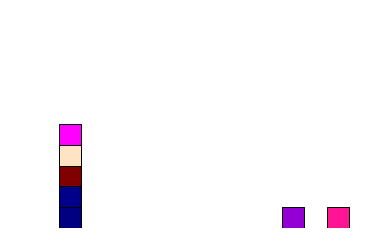

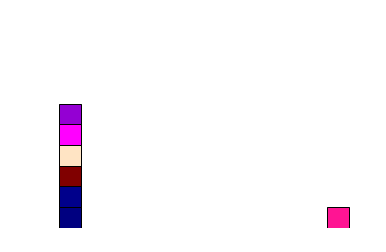

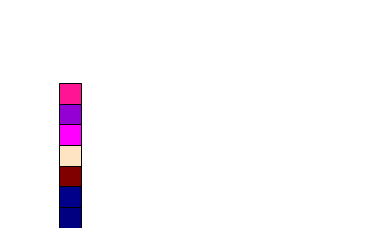

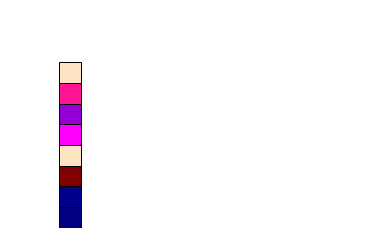

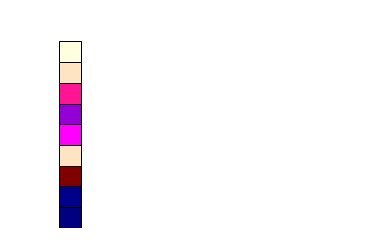

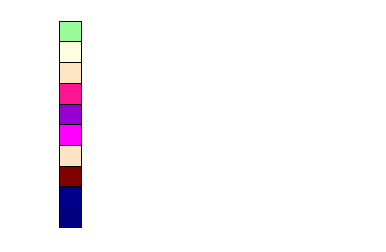

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem6.pddl
0.907526165470619 [('b0', 'red'), ('b2', 'blue')]


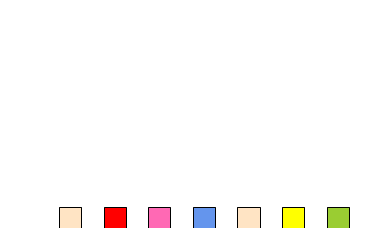

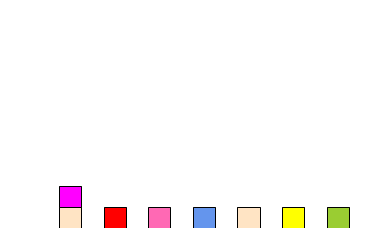

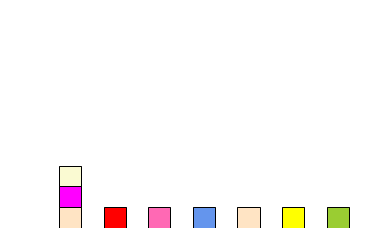

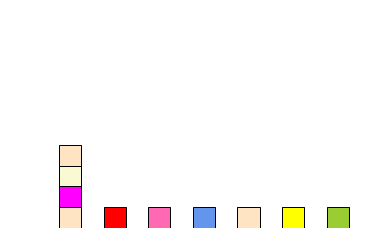

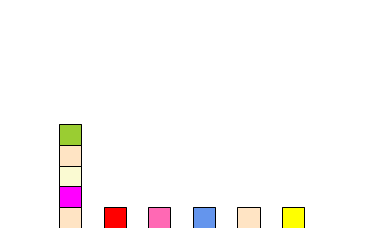

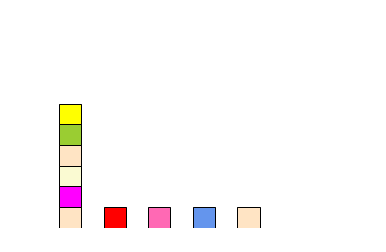

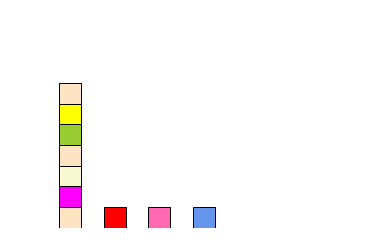

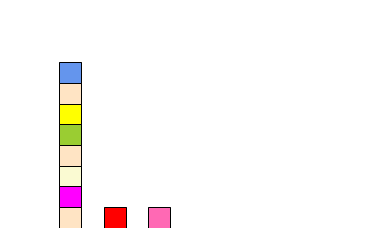

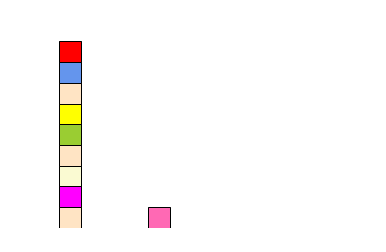

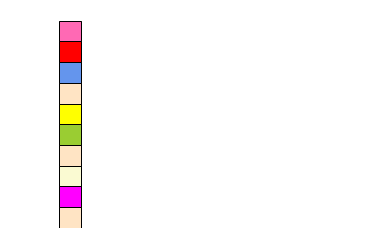

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem7.pddl
2.570257775779443 [('b0', 'red'), ('b0', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'red')]


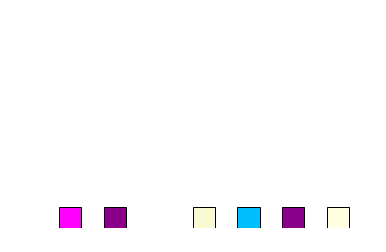

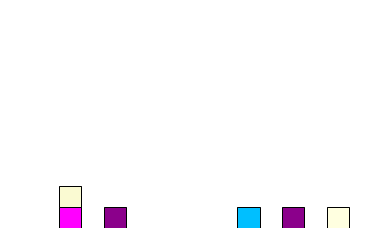

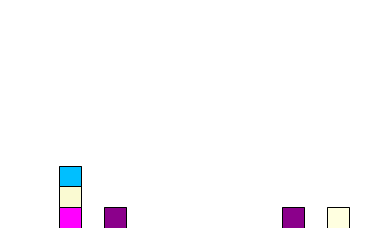

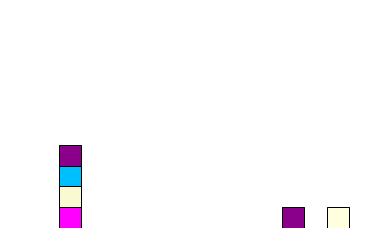

T: No, now you cannot put b9 in the tower because you must put red blocks on blue blocks


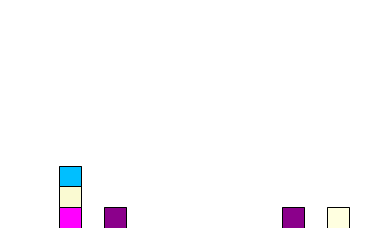

2.4683673788404636 [('b0', 'red'), ('b0', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'red')]


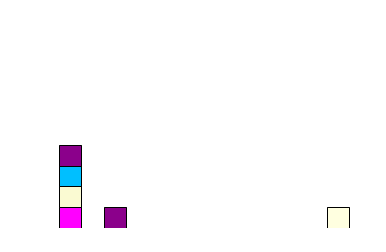

T: No, now you cannot put b9 in the tower because you must put red blocks on blue blocks


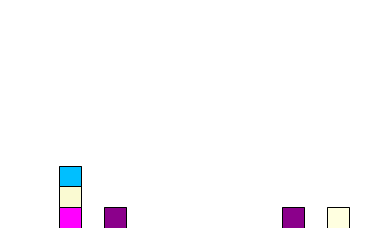

2.4683517288712054 [('b0', 'red'), ('b0', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'red')]
2.8424414480210713 [('b0', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'red')]


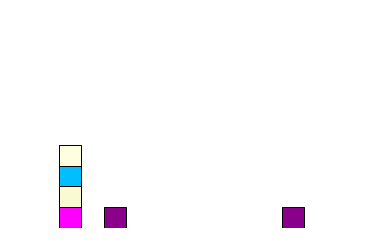

T: No, now you cannot put b9 in the tower because you must put red blocks on blue blocks


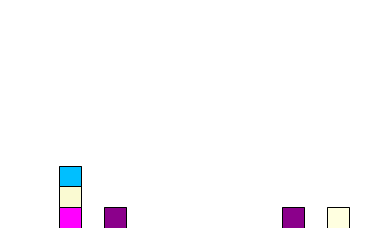

2.4683517288712054 [('b0', 'red'), ('b0', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'red')]
2.8424414480210713 [('b0', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'red')]


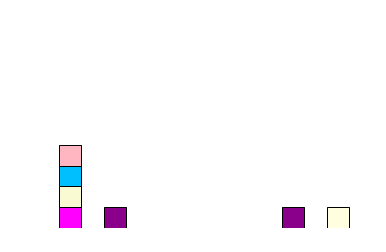

T: No, now you cannot put b9 in the tower because you must put red blocks on blue blocks


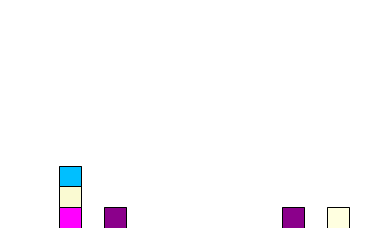

2.4683517288712054 [('b0', 'red'), ('b0', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'red')]
2.8424414480210713 [('b0', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'red')]


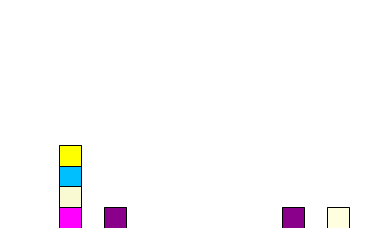

T: No, now you cannot put b9 in the tower because you must put red blocks on blue blocks


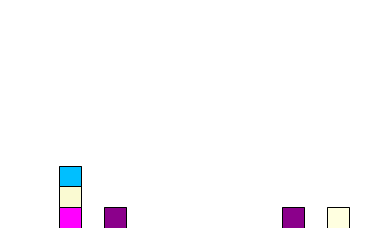

2.4683517288712054 [('b0', 'red'), ('b0', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'red')]
2.8424414480210713 [('b0', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'red')]


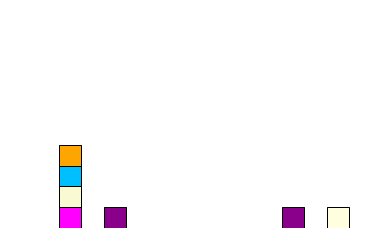

T: No, now you cannot put b9 in the tower because you must put red blocks on blue blocks


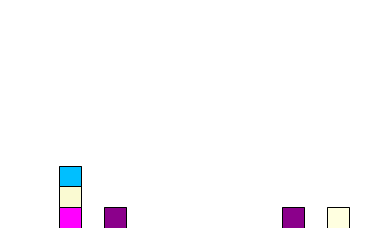

2.4683517288712054 [('b0', 'red'), ('b0', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'red')]
2.8424414480210713 [('b0', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b9', 'red')]


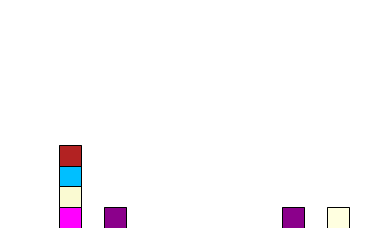

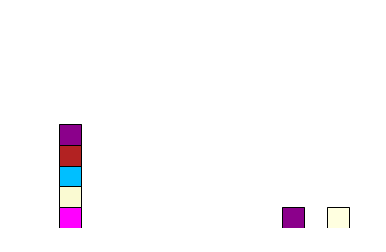

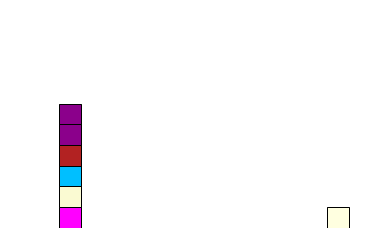

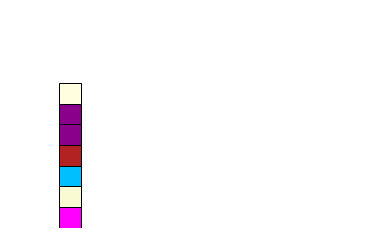

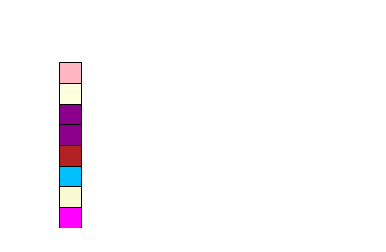

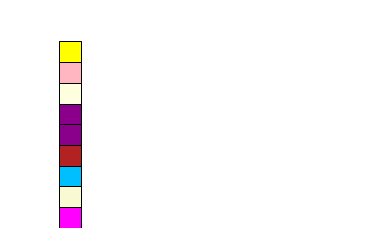

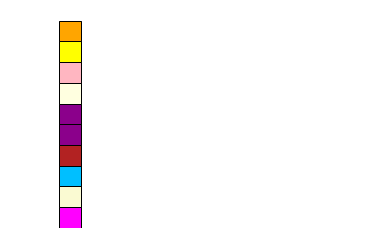

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem8.pddl
2.7201031700089695 [('b0', 'blue'), ('b2', 'blue'), ('b4', 'red'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue')]


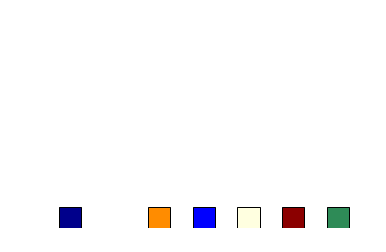

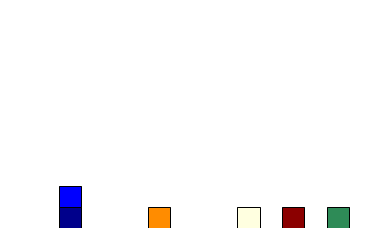

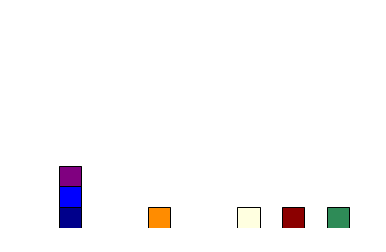

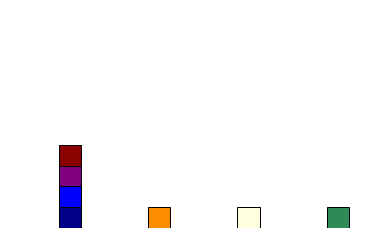

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


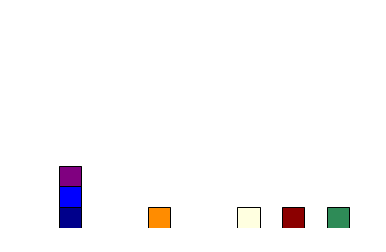

2.5230033481304917 [('b4', 'red'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue')]
2.6310203513024155 [('b4', 'red'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue'), ('b4', 'blue')]
3.0817196816117547 [('b4', 'red'), ('b8', 'blue'), ('b9', 'blue')]


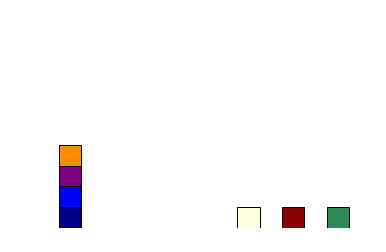

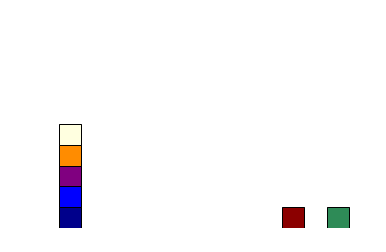

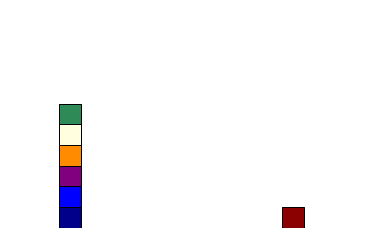

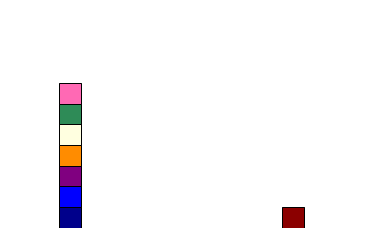

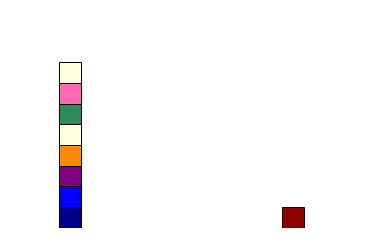

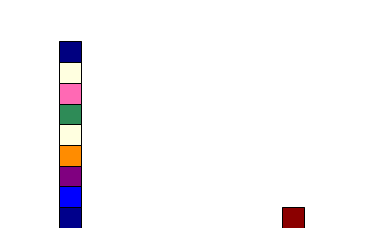

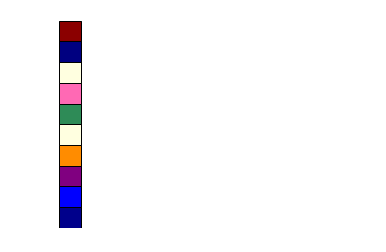

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem9.pddl
1.3897755667843392 [('b0', 'blue'), ('b1', 'blue'), ('b3', 'blue'), ('b9', 'red')]


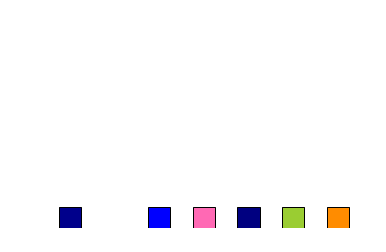

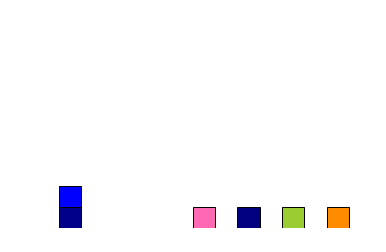

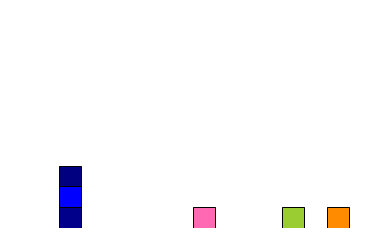

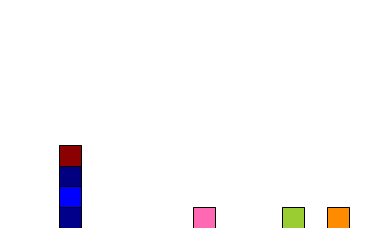

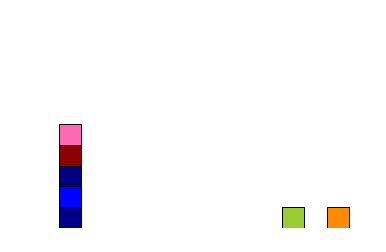

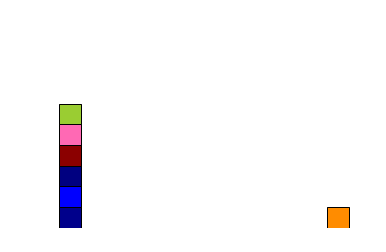

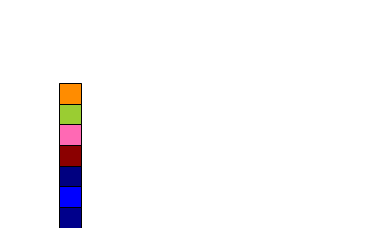

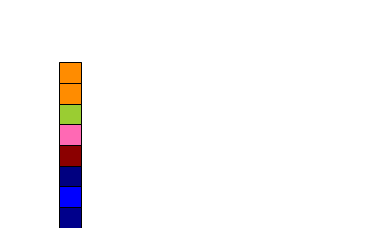

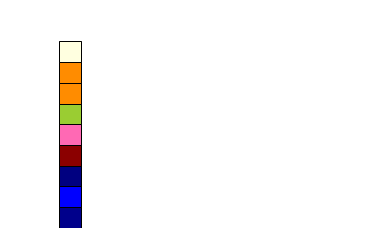

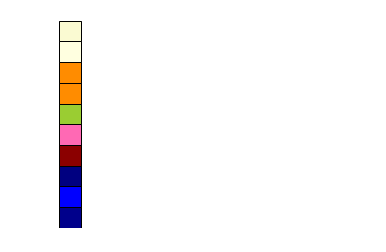

In [5]:

for problem in problems:
    w = world.PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problem))
    agent.new_world(w)
    while not w.test_success():
        plan = agent.plan()
        for a, args in plan:
            if a == 'reach-goal':
                break
            w.update(a, args)
            w.draw()
            correction = agent.teacher.correction(w)
            if correction:
                print("T: " + correction)
                agent.get_correction(correction, a, args)

                w.draw()
#                 raise ValueError()
                break
                



In [9]:
agent.goal.subformulas
agent.tmp_goal

In [15]:
from prob_model import KDEColourModel
from evaluation import test_colour_model, colour_probs, colour_dict, name_to_rgb

In [23]:
cm = KDEColourModel('red', fix_bw=True, bw=0.15)

In [24]:
cm.update([1,0,0], 1)

In [9]:
test_colour_model(cm)

NameError: name 'cm' is not defined

In [15]:
red_cm = agent.colour_models['red']
blue_cm = agent.colour_models['blue']

In [12]:
print(red_cm.data, red_cm.weights)
print(red_cm.data_neg, red_cm.weights_neg)

[[1. 0. 0.]] [1.]
None []


In [13]:
test_colour_model(red_cm)

True Label  R=1 R=0
Predict R=1| 4 | 0 |
        R=0| 1 | 37 |


{'fn': 1, 'fp': 0, 'tn': 37, 'tp': 4}

In [16]:
test_colour_model(blue_cm)

True Label  B=1 B=0
Predict B=1| 3 | 0 |
        B=0| 6 | 33 |


{'fn': 6, 'fp': 0, 'tn': 33, 'tp': 3}

In [13]:
red_cm

In [18]:
red_cm.bw(red_cm.data)

1.0

In [28]:
cm.bw(cm.data)

0.15